# Week 14 -- Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
scaler = StandardScaler()

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Update the number of weeks

In [5]:
no_games = 14

## Functions

In [6]:
def per_week_stats(dataframe, column1, column2):
    """
    This function creates a column for per week average stats.
    
    Parameters:
        dataframe: the dataframe you want to add to
        column1: the statistic you want to average over the number of games
        column2: the games column to average with
        
    Returns:
        new column with averaged stats across the number of games an individual has played
    
    """
    dataframe[column1 + '_pG'] = dataframe[column1]/dataframe[column2]

In [7]:
def print_metric(dataframe, metric, player_inx):
    """
    This function prints a stat for a player and the average for the stat across all the players listed.
    
    Parameters:
        dataframe: the dataframe you are working with
        metric: the stat you want to assess
        player_idx: the index number for the player in the dataframe
        
    Returns:
        printed stats for the average and a given player for comparison
    """
    average = round(dataframe[metric].mean(), 2)
    player_name = dataframe['Player'][player_inx]
    player = round(dataframe[metric][player_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(player_name + ' ' + metric + ': ' + str(player))
    print('-' * 50)
    return average, player_name, player

In [8]:
def print_metric_team(dataframe, metric, team_inx):
    """
    This function prints a stat for a team and the average for the stat across all teams listed.
    
    Parameters:
        dataframe: the dataframe you are working with
        metric: the stat you want to assess
        team_idx: the index number for the team in the dataframe
        
    Returns:
        printed stats for the average and a team for comparison
    """
    average = round(dataframe[metric].mean(), 2)
    team_name = dataframe['Team'][team_inx]
    team = round(dataframe[metric][team_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(team_name + ' ' + metric + ': ' + str(team))
    print('-' * 50)
    return average, team_name, team

In [9]:
def bar_plot(x, y, metric, x_label, y_label):
    """
    This function plots a stat on a bar graph for a group of players or teams determined in the x & y.
    
    Parameters:
        x: list of players/teams
        y: values of a given metric
        metric: the stat in question
        x_label: label for the x axis
        y_label: label for the y axis
        
    Returns:
        bar graph
    """
    
    plt.figure(figsize = (8, 4))
    
    plt.bar(x, y)
    
    plt.title(metric)
    plt.xlabel(x_label)
    plt.xticks(rotation=45)
    plt.ylabel(y_label)
    plt.show()

In [10]:
def scale_data(dataframe, column_list):
    """
    This function scales data so they can be easily compared.
    
    Parameters:
        dataframe: dataframe you want to scale
        column_list: list of columns that will be passed through and scaled
        
    Returns:
        scaled columns in the dataframe
    """
    for column in column_list:
        dataframe[column] = scaler.fit_transform(dataframe[[column]])

## Read in DataFrames

In [11]:
offense = pd.read_pickle('players')
defense = pd.read_pickle('defense')
kicking_df = pd.read_pickle('kicking')

In [12]:
print(offense.shape)
offense.head()

(601, 43)


,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14
0,Dalvin Cook,MIN,RB,25,12,12,0,0,0,0,0,273,1352,13.50,14,47,37,322,15.00,1,4,3,15,3,0,275.90,1,1,257.40,20.80,15.10,23.90,26.60,14.90,0.00,0.00,46.60,37.20,11.20,20.00,6.20,17.90,17.00
1,Derrick Henry,TEN,RB,26,13,13,0,0,0,0,0,297,1532,6.60,14,29,17,109,10.10,0,1,1,14,0,0,254.60,2,2,246.10,13.10,8.40,25.00,0.00,18.30,38.40,13.20,17.20,6.80,10.90,19.20,36.50,4.90,34.20
2,Tyreek Hill,KAN,WR,26,13,13,0,0,0,0,0,12,122,11.70,2,119,77,1158,15.40,14,1,0,16,0,0,262.50,1,3,224.00,10.60,16.80,16.20,12.40,15.30,2.50,11.50,21.80,24.10,0.00,16.00,44.90,8.80,23.10
3,Alvin Kamara,NOR,RB,25,13,8,0,0,0,0,0,154,723,10.90,10,96,77,699,9.80,4,1,0,14,0,0,264.70,3,4,226.20,18.70,29.40,31.70,17.90,11.90,0.00,14.80,16.30,10.90,27.80,10.50,5.20,15.70,15.40
4,Travis Kelce,KAN,TE,31,13,13,1,2,4,0,0,0,0,0.00,0,120,90,1250,21.90,9,1,1,9,0,0,222.20,1,5,177.20,11.00,15.00,8.70,7.00,16.80,16.50,3.10,16.90,15.90,0.00,18.90,8.20,19.60,19.60


In [13]:
print(defense.shape)
defense.head()

(32, 38)


,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14
0,Pittsburgh Steelers,13,237,811,4.90,3940,314,1312,4.20,7,452,5.30,253,11.60,2628,19,35,19,54.30,25,17,8,45,133.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00,18.00,7.00,12.00,17.00,14.00,3.00,6.00
1,Miami Dolphins,13,245,821,5.70,4710,341,1563,4.60,14,446,6.60,281,12.20,3147,16,38,22,57.90,25,16,9,34,126.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00,17.00,8.00,4.00,5.00,14.00,14.00,10.00
2,Los Angeles Rams,13,246,815,4.60,3716,315,1224,3.90,10,458,5.00,286,9.70,2492,14,37,22,59.50,21,13,8,42,123.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00,5.00,0.00,13.00,5.00,15.00,11.00,21.00
3,New Orleans Saints,13,265,780,5.00,3879,312,1159,3.70,7,432,5.80,262,11.20,2720,22,36,24,66.70,20,13,7,36,99.00,15.00,4.00,-3.00,4.00,3.00,0.00,1.00,7.00,16.00,14.00,16.00,14.00,6.00,2.00
4,Baltimore Ravens,13,273,862,5.30,4545,329,1477,4.50,12,505,5.80,328,10.00,3068,19,38,25,65.80,19,8,11,28,110.00,15.00,15.00,1.00,6.00,26.00,7.00,0.00,4.00,14.00,1.00,3.00,8.00,4.00,0.00


In [14]:
defense['Ttl_Turnovers'] = defense['Interceptions'] + defense['Fumbles']
per_week_stats(defense, 'Ttl_Pts_Allowed', 'GP')
per_week_stats(defense, 'Ttl_Yds', 'GP')
per_week_stats(defense, 'Rushing_Att', 'GP')
per_week_stats(defense, 'Rushing_Yds', 'GP')
per_week_stats(defense, 'Rushing_TDs', 'GP')
per_week_stats(defense, 'Passing_Att', 'GP')
per_week_stats(defense, 'Completions', 'GP')
defense['Completion_Percent_Allowed'] = defense['Completions']/defense['Passing_Att']
per_week_stats(defense, 'Passing_Yds', 'GP')
per_week_stats(defense, 'Passing_TDs', 'GP')
defense['Ttl_TDs_pG'] = defense['Rushing_TDs_pG'] + defense['Passing_TDs_pG']
per_week_stats(defense, 'Ttl_Turnovers', 'GP')
per_week_stats(defense, 'Fumbles', 'GP')
per_week_stats(defense, 'Sacks', 'GP')
per_week_stats(defense, 'TTL', 'GP')

In [15]:
defense.head()

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
0,Pittsburgh Steelers,13,237,811,4.90,3940,314,1312,4.20,7,452,5.30,253,11.60,2628,19,35,19,54.30,25,17,8,45,133.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00,18.00,7.00,12.00,17.00,14.00,3.00,6.00,18.23,303.08,24.15,100.92,0.54,34.77,19.46,0.56,202.15,1.46,2.00,1.92,0.62,3.46,10.23
1,Miami Dolphins,13,245,821,5.70,4710,341,1563,4.60,14,446,6.60,281,12.20,3147,16,38,22,57.90,25,16,9,34,126.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00,17.00,8.00,4.00,5.00,14.00,14.00,10.00,18.85,362.31,26.23,120.23,1.08,34.31,21.62,0.63,242.08,1.23,2.31,1.92,0.69,2.62,9.69
2,Los Angeles Rams,13,246,815,4.60,3716,315,1224,3.90,10,458,5.00,286,9.70,2492,14,37,22,59.50,21,13,8,42,123.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00,5.00,0.00,13.00,5.00,15.00,11.00,21.00,18.92,285.85,24.23,94.15,0.77,35.23,22.00,0.62,191.69,1.08,1.85,1.62,0.62,3.23,9.46
3,New Orleans Saints,13,265,780,5.00,3879,312,1159,3.70,7,432,5.80,262,11.20,2720,22,36,24,66.70,20,13,7,36,99.00,15.00,4.00,-3.00,4.00,3.00,0.00,1.00,7.00,16.00,14.00,16.00,14.00,6.00,2.00,20.38,298.38,24.00,89.15,0.54,33.23,20.15,0.61,209.23,1.69,2.23,1.54,0.54,2.77,7.62
4,Baltimore Ravens,13,273,862,5.30,4545,329,1477,4.50,12,505,5.80,328,10.00,3068,19,38,25,65.80,19,8,11,28,110.00,15.00,15.00,1.00,6.00,26.00,7.00,0.00,4.00,14.00,1.00,3.00,8.00,4.00,0.00,21.00,349.62,25.31,113.62,0.92,38.85,25.23,0.65,236.00,1.46,2.38,1.46,0.85,2.15,8.46


In [16]:
offense[offense['Player'] == "J.K. Dobbins"]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14
106,J.K. Dobbins,BAL,RB,22,12,0,0,0,0,0,0,96,504,7.50,5,22,17,103,6.60,0,1,0,5,2,0,103.20,29,,94.70,14.20,6.10,4.40,1.70,5.50,2.90,0.00,12.10,3.50,1.40,16.50,0.00,13.10,13.30


In [17]:
taken_wrt = ['Davante Adams', 'Cam Akers', 'Keenan Allen', 'Mark Andrews', 'Odell Beckham Jr.', 
             'A.J. Brown', 'John Brown', 'DJ Chark', 'Nick Chubb', 
             'James Conner', 'Dalvin Cook', 'Jared Cook', 'Amari Cooper', 'Mike Davis', 'Stefon Diggs',
             'J.K. Dobbins', 'Kenyan Drake', 'Eric Ebron', 'Chase Edmonds', 'Clyde Edwards-Helaire',
             'Austin Ekeler', 'Ezekiel Elliott', 'Evan Engram',  'Zach Ertz', 'Mike Evans', 'Noah Fant',
             'Leonard Fournette', 'Will Fuller', 'Wayne Gallman', 'Mike Gesicki', 
             'Chris Godwin', 'Dallas Goedert', 'Kenny Golladay', 'Melvin Gordon', 
             'Todd Gurley', 'Damien Harris', 'Hunter Henry', 'Tyreek Hill', 'T.Y. Hilton', 'T.J. Hockenson', 
             'Jordan Howard', 'Kareem Hunt', 'Josh Jacobs', 'Justin Jefferson', 
             'David Johnson', 'Diontae Johnson', 'Aaron Jones', 'Ronald Jones II', 'Alvin Kamara', 
             'Travis Kelce', 'George Kittle', 'Cooper Kupp', 'Phillip Lindsay', 'Tyler Lockett', 
             'Christian McCaffrey', 'Terry McLaurin', 'D.K. Metcalf', 'Joe Mixon',
             'David Montgomery', 'D.J. Moore', 'Zack Moss', 'Raheem Mostert', 'DeVante Parker',
             'Calvin Ridley', 'James Robinson', 'Allen Robinson', 'Curtis Samuel', 'Miles Sanders', 
             'Darius Slayton', 'JuJu Smith-Schuster', 'Jonathan Taylor', 'Adam Thielen', 'Michael Thomas', 
             'Darren Waller', 'Robert Woods']


In [18]:
taken_qbs = ['Josh Allen', 'Tom Brady', 'Drew Brees', 'Jared Goff', 'Lamar Jackson', 'Daniel Jones', 
             'Patrick Mahomes', 'Kyler Murray', 'Cam Newton', 'Ben Roethlisberger', 'Matt Ryan', 
             'Deshaun Watson', 'Russell Wilson']

In [19]:
taken_k = ['Rodrigo Blankenship', 'Harrison Butker', 'Jake Elliot', "Ka'imi Fairbairn",  
           'Younghoe Koo', 'Wil Lutz', 'Joey Slye', 'Justin Tucker', 'Greg Zuerlein']

In [20]:
myteam_wrt = ['Robby Anderson', 'Tyler Boyd', 'Chris Carson', 'Brandin Cooks',
              'Corey Davis', 'Rob Gronkowski', 'Derrick Henry', 'Nyheim Hines', 'DeAndre Hopkins',
              'Julio Jones', "D'Andre Swift"]


## QB Analysis

In [21]:
quarterbacks = offense[offense['Position'] == 'QB']
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14
5,Patrick Mahomes,KAN,QB,25,13,13,340,497,4208,33,5,52,250,12.10,2,1,0,0,0.00,0,3,1,2,0,2,334.30,1,6,334.20,20.40,27.50,40.00,20.20,30.70,20.60,12.00,36.60,30.90,0.00,22.50,31.30,19.30,21.60
6,Kyler Murray,ARI,QB,23,13,13,309,461,3231,23,10,115,712,7.90,10,0,0,0,0.00,0,7,3,10,0,0,336.40,2,7,336.40,27.30,33.10,24.70,23.10,27.30,28.90,38.10,0.00,37.90,30.90,20.30,8.90,17.40,18.50
8,Aaron Rodgers,GNB,QB,37,13,13,312,448,3685,39,4,29,100,7.50,2,1,1,-6,-6.00,0,3,2,2,0,0,317.30,3,9,316.70,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.50,28.90,26.40,22.70,25.60,23.50,30.90
10,Russell Wilson,SEA,QB,32,13,13,326,463,3685,36,12,69,423,7.30,1,0,0,0,0.00,0,7,4,1,0,1,321.70,4,11,321.60,31.80,34.40,36.80,21.90,25.50,0.00,32.90,28.70,24.10,11.90,20.10,14.40,16.00,23.10
11,Josh Allen,BUF,QB,24,13,13,323,471,3641,28,9,93,350,10.60,6,1,1,12,12.00,1,8,6,7,0,0,315.30,5,12,314.90,28.20,34.50,32.20,25.40,18.30,16.10,16.40,13.50,36.00,28.40,0.00,16.50,30.10,19.30


In [22]:
per_week_stats(quarterbacks, 'CompletedPasses', 'Games')
per_week_stats(quarterbacks, 'PassesAttempted', 'Games')
quarterbacks['Completion_Percent'] = quarterbacks['CompletedPasses_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'PassingYds', 'Games')
per_week_stats(quarterbacks, 'PassingTDs', 'Games')
quarterbacks['Yds_pAtt'] = quarterbacks['PassingYds_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'Interceptions', 'Games')
per_week_stats(quarterbacks, 'LostFumbles', 'Games')
quarterbacks['Ttl_Turnovers_pG'] = quarterbacks['Interceptions_pG'] + quarterbacks['LostFumbles_pG']
per_week_stats(quarterbacks, 'RushingYds', 'Games')
per_week_stats(quarterbacks, 'TTL', 'Games')

In [23]:
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,Ttl_Turnovers_pG,RushingYds_pG,TTL_pG
5,Patrick Mahomes,KAN,QB,25,13,13,340,497,4208,33,5,52,250,12.10,2,1,0,0,0.00,0,3,1,2,0,2,334.30,1,6,334.20,20.40,27.50,40.00,20.20,30.70,20.60,12.00,36.60,30.90,0.00,22.50,31.30,19.30,21.60,26.15,38.23,0.68,323.69,2.54,8.47,0.38,0.08,0.46,19.23,25.71
6,Kyler Murray,ARI,QB,23,13,13,309,461,3231,23,10,115,712,7.90,10,0,0,0,0.00,0,7,3,10,0,0,336.40,2,7,336.40,27.30,33.10,24.70,23.10,27.30,28.90,38.10,0.00,37.90,30.90,20.30,8.90,17.40,18.50,23.77,35.46,0.67,248.54,1.77,7.01,0.77,0.23,1.00,54.77,25.88
8,Aaron Rodgers,GNB,QB,37,13,13,312,448,3685,39,4,29,100,7.50,2,1,1,-6,-6.00,0,3,2,2,0,0,317.30,3,9,316.70,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.50,28.90,26.40,22.70,25.60,23.50,30.90,24.00,34.46,0.70,283.46,3.00,8.23,0.31,0.15,0.46,7.69,24.36
10,Russell Wilson,SEA,QB,32,13,13,326,463,3685,36,12,69,423,7.30,1,0,0,0,0.00,0,7,4,1,0,1,321.70,4,11,321.60,31.80,34.40,36.80,21.90,25.50,0.00,32.90,28.70,24.10,11.90,20.10,14.40,16.00,23.10,25.08,35.62,0.70,283.46,2.77,7.96,0.92,0.31,1.23,32.54,24.74
11,Josh Allen,BUF,QB,24,13,13,323,471,3641,28,9,93,350,10.60,6,1,1,12,12.00,1,8,6,7,0,0,315.30,5,12,314.90,28.20,34.50,32.20,25.40,18.30,16.10,16.40,13.50,36.00,28.40,0.00,16.50,30.10,19.30,24.85,36.23,0.69,280.08,2.15,7.73,0.69,0.46,1.15,26.92,24.22


In [24]:
quarterbacks.describe()

,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,Ttl_Turnovers_pG,RushingYds_pG,TTL_pG
count,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,74.00,70.00,74.00,74.00,70.00,74.00,74.00,74.00,74.00,74.00
mean,28.69,7.14,5.66,129.24,197.43,1421.97,9.42,4.39,23.03,99.00,6.22,1.30,0.30,0.22,1.53,0.73,0.04,2.81,1.30,1.34,0.05,0.50,106.90,106.79,8.42,8.83,8.59,8.20,7.13,7.08,7.84,6.65,8.29,6.42,6.62,6.89,8.07,7.83,14.18,22.12,0.62,153.74,0.94,6.40,0.53,0.16,0.69,9.90,11.02
std,5.09,4.51,5.36,124.25,185.73,1398.35,10.81,4.18,28.05,160.56,4.42,2.18,0.99,0.76,9.00,3.32,0.20,3.01,1.71,2.25,0.28,0.95,110.02,109.96,10.42,11.72,10.90,10.73,10.04,10.26,11.67,9.25,11.31,9.36,9.41,9.10,10.45,10.18,9.55,14.34,0.14,106.98,0.83,1.62,0.43,0.20,0.51,13.04,8.32
min,22.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-7.00,-2.00,0.00,0.00,0.00,-6.00,-6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.80,-0.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-4.00,0.00
25%,25.00,3.00,0.00,10.25,19.00,98.25,0.00,0.00,5.00,3.00,2.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.35,7.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.12,5.81,0.58,45.25,0.00,6.00,0.00,0.00,0.20,0.40,3.02
50%,27.50,7.00,4.50,90.00,137.00,955.00,4.00,3.00,12.50,22.00,6.40,0.00,0.00,0.00,0.00,0.00,0.00,1.50,1.00,0.00,0.00,0.00,62.45,62.40,0.00,0.00,0.00,0.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.30,0.00,0.95,16.96,27.34,0.65,177.21,1.00,6.73,0.60,0.08,0.72,5.61,11.47
75%,32.00,12.00,12.00,248.00,395.50,2671.00,17.50,8.00,30.00,138.25,9.35,2.00,0.00,0.00,0.00,0.00,0.00,5.00,2.00,2.00,0.00,1.00,210.88,210.75,17.53,16.97,15.62,16.40,14.02,14.83,16.77,13.38,17.83,11.68,13.97,14.18,17.07,16.27,22.81,34.31,0.68,248.12,1.53,7.43,0.83,0.30,1.00,15.60,17.84
max,43.00,13.00,13.00,345.00,521.00,4208.00,39.00,15.00,125.00,793.00,19.00,11.00,8.00,6.00,74.00,16.00,1.00,11.00,8.00,11.00,2.00,5.00,336.40,336.40,31.80,39.80,40.00,38.30,30.70,32.00,38.50,36.60,37.90,31.80,31.40,33.10,32.70,34.90,30.20,44.40,1.00,371.20,3.00,9.00,2.00,1.00,2.00,66.08,27.72


In [25]:
quarterbacks[quarterbacks['Player'].isin(['Aaron Rodgers', 'Justin Herbert'])]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,Ttl_Turnovers_pG,RushingYds_pG,TTL_pG
8,Aaron Rodgers,GNB,QB,37,13,13,312,448,3685,39,4,29,100,7.50,2,1,1,-6,-6.00,0,3,2,2,0,0,317.30,3,9,316.70,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.50,28.90,26.40,22.70,25.60,23.50,30.90,24.00,34.46,0.70,283.46,3.00,8.23,0.31,0.15,0.46,7.69,24.36
41,Justin Herbert,LAC,QB,22,12,12,331,499,3467,25,10,41,185,9.10,3,0,0,0,0.00,0,6,1,3,0,1,265.20,9,42,265.10,0.00,23.20,15.70,24.00,27.40,0.00,38.50,23.20,23.40,21.50,27.70,17.40,6.40,16.70,27.58,41.58,0.66,288.92,2.08,6.95,0.83,0.08,0.92,15.42,22.09


In [26]:
available_qbs = quarterbacks[~quarterbacks['Player'].isin(taken_qbs)]
available_qbs = available_qbs[available_qbs['Player'] != 'Dak Prescott']
available_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,Ttl_Turnovers_pG,RushingYds_pG,TTL_pG
8,Aaron Rodgers,GNB,QB,37,13,13,312,448,3685,39,4,29,100,7.50,2,1,1,-6,-6.00,0,3,2,2,0,0,317.30,3,9,316.70,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.50,28.90,26.40,22.70,25.60,23.50,30.90,24.00,34.46,0.70,283.46,3.00,8.23,0.31,0.15,0.46,7.69,24.36
36,Ryan Tannehill,TEN,QB,32,13,13,265,403,3209,28,5,30,152,5.70,2,1,1,0,0.00,0,5,1,2,2,1,267.10,7,37,266.60,19.40,26.80,12.70,0.00,30.00,29.60,17.30,18.30,14.60,10.80,22.90,19.10,28.60,16.50,20.38,31.00,0.66,246.85,2.15,7.96,0.38,0.08,0.46,11.69,20.51
41,Justin Herbert,LAC,QB,22,12,12,331,499,3467,25,10,41,185,9.10,3,0,0,0,0.00,0,6,1,3,0,1,265.20,9,42,265.10,0.00,23.20,15.70,24.00,27.40,0.00,38.50,23.20,23.40,21.50,27.70,17.40,6.40,16.70,27.58,41.58,0.66,288.92,2.08,6.95,0.83,0.08,0.92,15.42,22.09
78,Kirk Cousins,MIN,QB,32,13,13,270,400,3298,27,12,24,130,9.20,0,0,0,0,0.00,0,7,5,0,0,5,240.90,12,,241.00,22.80,1.50,21.40,14.90,15.20,26.70,0.00,10.40,20.80,18.60,23.00,26.20,22.40,17.10,20.77,30.77,0.68,253.69,2.08,8.24,0.92,0.38,1.31,10.00,18.54
79,Derek Carr,LVR,QB,29,13,13,300,440,3343,24,7,35,141,4.30,2,0,0,0,0.00,0,11,8,2,0,0,232.80,13,,232.80,13.60,21.60,15.40,20.40,25.00,0.00,20.30,12.60,14.00,7.20,22.60,1.60,32.70,25.80,23.08,33.85,0.68,257.15,1.85,7.60,0.54,0.62,1.15,10.85,17.91


In [27]:
scaled_qbs = available_qbs[['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted', 'CompletedPasses_pG', 
                            'PassesAttempted_pG', 'Completion_Percent', 'PassingYds_pG', 'PassingTDs_pG', 'Yds_pAtt',
                            'Interceptions_pG', 'LostFumbles_pG','RushingYds_pG', 'TTL_pG']]

qb_columns = ['CompletedPasses_pG', 'PassesAttempted_pG', 'Completion_Percent', 'PassingYds_pG', 'PassingTDs_pG', 
               'Interceptions_pG', 'LostFumbles_pG','RushingYds_pG']

scale_data(scaled_qbs, qb_columns)

scaled_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
8,Aaron Rodgers,GNB,QB,37,13,13,1.32,1.10,0.55,1.56,3.05,8.23,-0.40,0.07,0.12,24.36
36,Ryan Tannehill,TEN,QB,32,13,13,0.93,0.85,0.30,1.19,1.90,7.96,-0.23,-0.31,0.63,20.51
41,Justin Herbert,LAC,QB,22,12,12,1.72,1.61,0.34,1.61,1.81,6.95,0.75,-0.28,1.11,22.09
78,Kirk Cousins,MIN,QB,32,13,13,0.97,0.84,0.41,1.26,1.80,8.24,0.95,1.20,0.42,18.54
79,Derek Carr,LVR,QB,29,13,13,1.22,1.06,0.46,1.30,1.49,7.60,0.11,2.34,0.53,17.91


In [28]:
scaled_qbs['Combined_Score'] = (scaled_qbs['CompletedPasses_pG'] + scaled_qbs['PassesAttempted_pG'] + 
                                scaled_qbs['Completion_Percent'] + scaled_qbs['PassingYds_pG'] + 
                                scaled_qbs['PassingTDs_pG'] + scaled_qbs['Yds_pAtt'] +
                                scaled_qbs['RushingYds_pG'] + scaled_qbs['TTL_pG'] -
                                scaled_qbs['Interceptions_pG'] - scaled_qbs['LostFumbles_pG'])

In [29]:
scaled_qbs.sort_values('Combined_Score', ascending=False, inplace=True)

In [30]:
scaled_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG,Combined_Score
8,Aaron Rodgers,GNB,QB,37,13,13,1.32,1.10,0.55,1.56,3.05,8.23,-0.40,0.07,0.12,24.36,40.63
41,Justin Herbert,LAC,QB,22,12,12,1.72,1.61,0.34,1.61,1.81,6.95,0.75,-0.28,1.11,22.09,36.76
36,Ryan Tannehill,TEN,QB,32,13,13,0.93,0.85,0.30,1.19,1.90,7.96,-0.23,-0.31,0.63,20.51,34.82
82,Teddy Bridgewater,CAR,QB,28,12,12,1.32,1.05,0.62,1.31,0.57,7.64,0.39,-0.28,1.68,18.32,32.41
92,Ryan Fitzpatrick,MIA,QB,38,8,7,1.08,0.91,0.48,1.11,1.02,7.52,1.12,-0.69,1.55,18.68,31.90


In [31]:
qb1 = 8
qb2 = 41

Week 12 match ups:
    
    Green Bay vs Carolia Panthers
    Los Angeles Chargers vs Las Vegas Raiders

In [32]:
qb_opp = ['Carolina Panthers', 'Las Vegas Raiders']
defense[defense['Team'].isin(qb_opp)]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
19,Carolina Panthers,13,332,828,5.70,4737,332,1477,4.40,14,477,6.60,330,10.30,3260,23,47,29,61.70,18,5,13,19,72.00,-1.00,3.00,11.00,3.00,5.00,2.00,3.00,4.00,2.00,-1.00,17.00,19.00,0.00,2.00,25.54,364.38,25.54,113.62,1.08,36.69,25.38,0.69,250.77,1.77,2.85,1.38,1.00,1.46,5.54
29,Las Vegas Raiders,13,391,839,6.00,4994,352,1665,4.70,21,472,6.80,297,11.50,3329,22,55,36,65.50,15,10,5,15,35.00,0.00,2.00,3.00,0.00,4.00,0.00,-4.00,9.00,4.00,16.00,-2.00,-1.00,8.00,-4.00,30.08,384.15,27.08,128.08,1.62,36.31,22.85,0.63,256.08,1.69,3.31,1.15,0.38,1.15,2.69


In [33]:
def1 = 19
def2 = 29

### Quarterback Comparisons

Quarterbacks

Avg PassingYds_pG: 153.74
Aaron Rodgers PassingYds_pG: 283.46
--------------------------------------------------
Avg PassingYds_pG: 153.74
Justin Herbert PassingYds_pG: 288.92
--------------------------------------------------


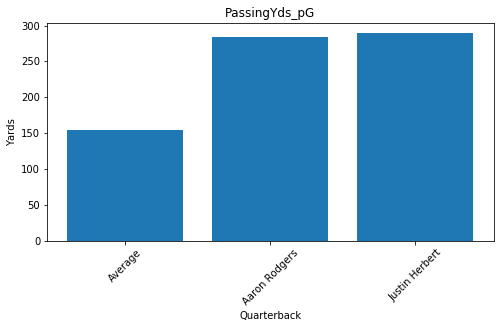

----------------------------------------
Defense

Avg Passing_Yds_pG: 239.3
Carolina Panthers Passing_Yds_pG: 250.77
--------------------------------------------------
Avg Passing_Yds_pG: 239.3
Las Vegas Raiders Passing_Yds_pG: 256.08
--------------------------------------------------


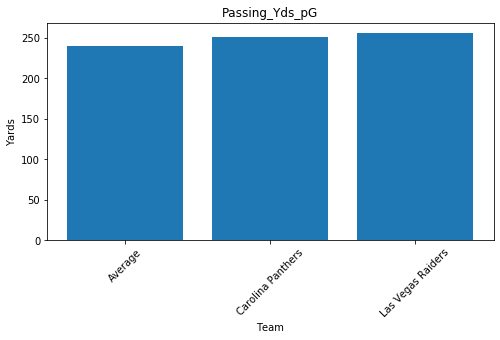

In [34]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'PassingYds_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassingYds_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'PassingYds_pG', 'Quarterback', 'Yards')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Passing_Yds_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Passing_Yds_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Passing_Yds_pG', 'Team', 'Yards')

Quarterbacks

Avg PassesAttempted_pG: 22.12
Aaron Rodgers PassesAttempted_pG: 34.46
--------------------------------------------------
Avg PassesAttempted_pG: 22.12
Justin Herbert PassesAttempted_pG: 41.58
--------------------------------------------------


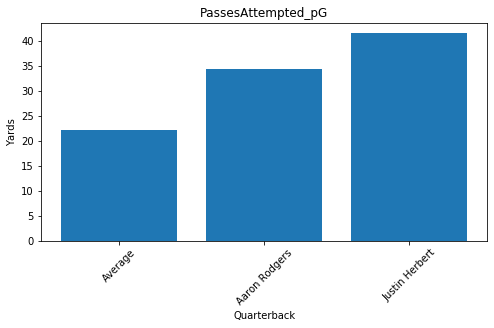

----------------------------------------
Defense

Avg Passing_Att_pG: 35.22
Carolina Panthers Passing_Att_pG: 36.69
--------------------------------------------------
Avg Passing_Att_pG: 35.22
Las Vegas Raiders Passing_Att_pG: 36.31
--------------------------------------------------


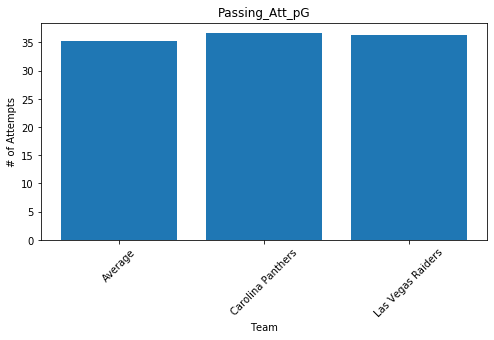

In [35]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'PassesAttempted_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassesAttempted_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'PassesAttempted_pG', 'Quarterback', 'Yards')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Passing_Att_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Passing_Att_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Passing_Att_pG', 'Team', '# of Attempts')

Quarterbacks

Avg Completion_Percent: 0.62
Aaron Rodgers Completion_Percent: 0.7
--------------------------------------------------
Avg Completion_Percent: 0.62
Justin Herbert Completion_Percent: 0.66
--------------------------------------------------


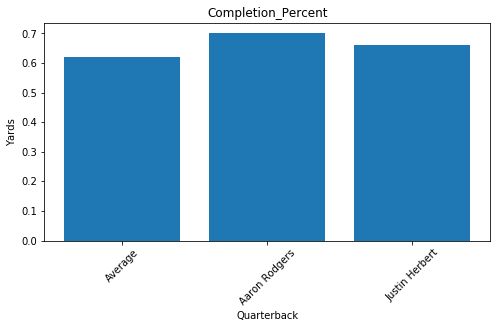

----------------------------------------
Defense

Avg Completion_Percent_Allowed: 0.65
Carolina Panthers Completion_Percent_Allowed: 0.69
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
Las Vegas Raiders Completion_Percent_Allowed: 0.63
--------------------------------------------------


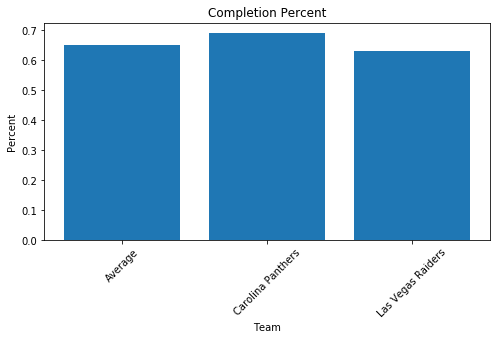

In [36]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'Completion_Percent', qb1)
average, herbert, justin = print_metric(quarterbacks, 'Completion_Percent', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'Completion_Percent', 'Quarterback', 'Yards')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Completion_Percent_Allowed', def1)
average, defteam2, team2 = print_metric_team(defense, 'Completion_Percent_Allowed', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Completion Percent', 'Team', 'Percent')

Quarterbacks

Avg RushingYds_pG: 9.9
Aaron Rodgers RushingYds_pG: 7.69
--------------------------------------------------
Avg RushingYds_pG: 9.9
Justin Herbert RushingYds_pG: 15.42
--------------------------------------------------


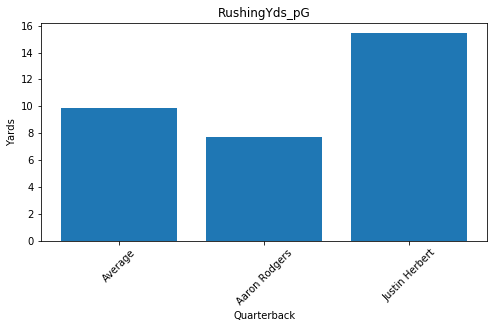

----------------------------------------
Defense

Avg Rushing_Yds_pG: 116.87
Carolina Panthers Rushing_Yds_pG: 113.62
--------------------------------------------------
Avg Rushing_Yds_pG: 116.87
Las Vegas Raiders Rushing_Yds_pG: 128.08
--------------------------------------------------


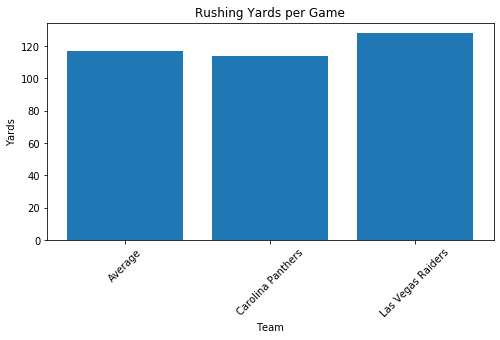

In [37]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'RushingYds_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'RushingYds_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'RushingYds_pG', 'Quarterback', 'Yards')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Rushing_Yds_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Rushing_Yds_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Rushing Yards per Game', 'Team', 'Yards')

Quarterbacks

Avg PassingTDs_pG: 0.94
Aaron Rodgers PassingTDs_pG: 3.0
--------------------------------------------------
Avg PassingTDs_pG: 0.94
Justin Herbert PassingTDs_pG: 2.08
--------------------------------------------------


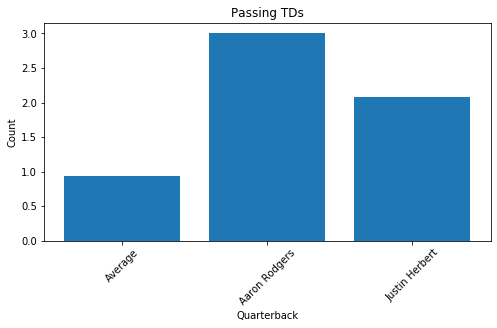

----------------------------------------
Defense

Avg Passing_TDs_pG: 1.69
Carolina Panthers Passing_TDs_pG: 1.77
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Las Vegas Raiders Passing_TDs_pG: 1.69
--------------------------------------------------


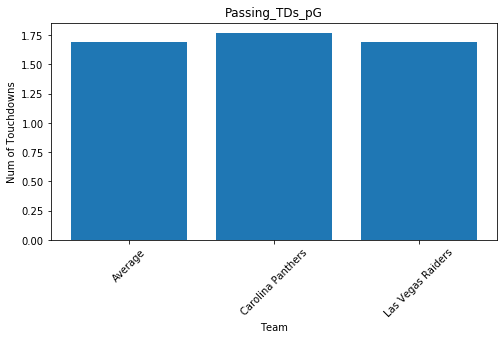

In [38]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'PassingTDs_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassingTDs_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'Passing TDs', 'Quarterback', 'Count')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Passing_TDs_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Passing_TDs_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Passing_TDs_pG', 'Team', 'Num of Touchdowns')

Quarterbacks

Avg Ttl_Turnovers_pG: 0.69
Aaron Rodgers Ttl_Turnovers_pG: 0.46
--------------------------------------------------
Avg Ttl_Turnovers_pG: 0.69
Justin Herbert Ttl_Turnovers_pG: 0.92
--------------------------------------------------


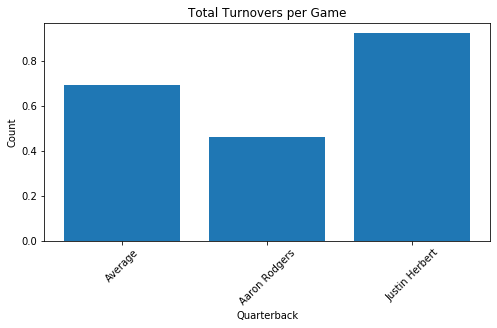

----------------------------------------
Defense

Avg Ttl_Turnovers_pG: 1.33
Carolina Panthers Ttl_Turnovers_pG: 1.38
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.33
Las Vegas Raiders Ttl_Turnovers_pG: 1.15
--------------------------------------------------


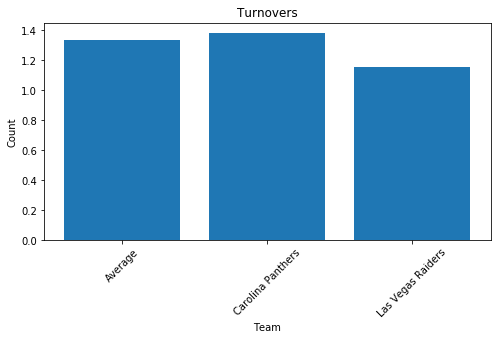

In [39]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'Ttl_Turnovers_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'Ttl_Turnovers_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'Total Turnovers per Game', 'Quarterback', 'Count')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Ttl_Turnovers_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Ttl_Turnovers_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Turnovers', 'Team', 'Count')

#### Additional Defense Stats

Avg RZ_Percent: 61.16
Carolina Panthers RZ_Percent: 61.7
--------------------------------------------------
Avg RZ_Percent: 61.16
Las Vegas Raiders RZ_Percent: 65.5
--------------------------------------------------


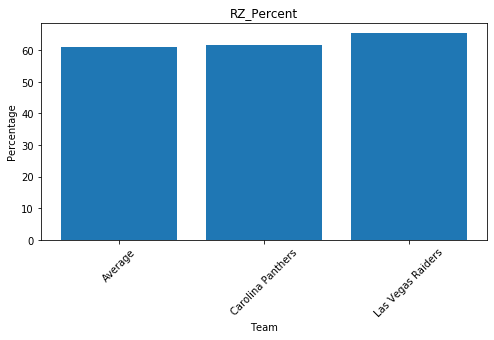

In [40]:
average, defteam1, team1 = print_metric_team(defense, 'RZ_Percent', def1)
average, defteam2, team2 = print_metric_team(defense, 'RZ_Percent', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'RZ_Percent', 'Team', 'Percentage')

Avg Ttl_Pts_Allowed_pG: 24.67
Carolina Panthers Ttl_Pts_Allowed_pG: 25.54
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.67
Las Vegas Raiders Ttl_Pts_Allowed_pG: 30.08
--------------------------------------------------


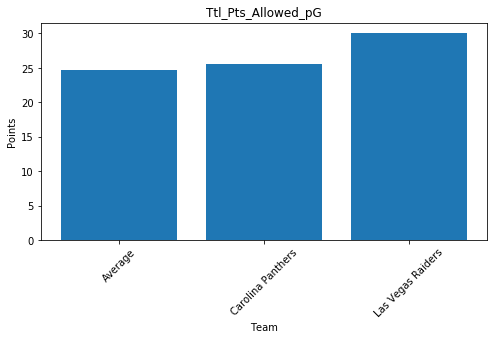

In [41]:
average, defteam1, team1 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Ttl_Pts_Allowed_pG', 'Team', 'Points')

Avg Sacks_pG: 2.2
Carolina Panthers Sacks_pG: 1.46
--------------------------------------------------
Avg Sacks_pG: 2.2
Las Vegas Raiders Sacks_pG: 1.15
--------------------------------------------------


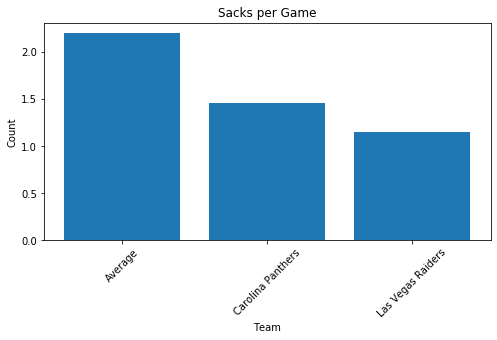

In [42]:
average, defteam1, team1 = print_metric_team(defense, 'Sacks_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Sacks_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Sacks per Game', 'Team', 'Count')



## Runningbacks

In [43]:
runningbacks = offense[offense['Position'] == 'RB']

In [44]:
per_week_stats(runningbacks, 'RushingAttempts', 'Games')
per_week_stats(runningbacks, 'RushingYds', 'Games')
per_week_stats(runningbacks, 'Targeted', 'Games')
per_week_stats(runningbacks, 'Receptions', 'Games')
per_week_stats(runningbacks, 'RushingTDs', 'Games')
per_week_stats(runningbacks, 'ReceivingTDs', 'Games')
per_week_stats(runningbacks, 'LostFumbles', 'Games')

In [45]:
runningbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
0,Dalvin Cook,MIN,RB,25,12,12,0,0,0,0,0,273,1352,13.50,14,47,37,322,15.00,1,4,3,15,3,0,275.90,1,1,257.40,20.80,15.10,23.90,26.60,14.90,0.00,0.00,46.60,37.20,11.20,20.00,6.20,17.90,17.00,22.75,112.67,3.92,3.08,1.17,0.08,0.25
1,Derrick Henry,TEN,RB,26,13,13,0,0,0,0,0,297,1532,6.60,14,29,17,109,10.10,0,1,1,14,0,0,254.60,2,2,246.10,13.10,8.40,25.00,0.00,18.30,38.40,13.20,17.20,6.80,10.90,19.20,36.50,4.90,34.20,22.85,117.85,2.23,1.31,1.08,0.00,0.08
3,Alvin Kamara,NOR,RB,25,13,8,0,0,0,0,0,154,723,10.90,10,96,77,699,9.80,4,1,0,14,0,0,264.70,3,4,226.20,18.70,29.40,31.70,17.90,11.90,0.00,14.80,16.30,10.90,27.80,10.50,5.20,15.70,15.40,11.85,55.62,7.38,5.92,0.77,0.31,0.00
9,James Robinson,JAX,RB,22,13,13,0,0,0,0,0,224,1035,10.20,7,57,46,326,7.90,2,3,1,9,1,0,213.10,4,10,190.10,9.00,18.00,24.90,10.70,5.00,11.30,27.70,0.00,15.90,11.20,9.40,21.90,16.80,8.30,17.23,79.62,4.38,3.54,0.54,0.15,0.08
14,Aaron Jones,GNB,RB,26,11,11,0,0,0,0,0,160,823,6.40,7,51,38,285,12.00,2,2,0,9,0,0,183.80,5,15,164.80,13.60,41.60,14.60,17.10,0.00,10.10,0.00,0.00,7.90,9.50,13.10,9.00,20.80,7.50,14.55,74.82,4.64,3.45,0.64,0.18,0.00


In [46]:
runningbacks[runningbacks['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
1,Derrick Henry,TEN,RB,26,13,13,0,0,0,0,0,297,1532,6.60,14,29,17,109,10.10,0,1,1,14,0,0,254.60,2,2,246.10,13.10,8.40,25.00,0.00,18.30,38.40,13.20,17.20,6.80,10.90,19.20,36.50,4.90,34.20,22.85,117.85,2.23,1.31,1.08,0.00,0.08
49,Chris Carson,SEA,RB,26,9,9,0,0,0,0,0,99,505,6.00,5,38,30,232,14.30,4,1,0,9,0,0,142.70,18,50,127.70,18.60,16.80,7.60,22.00,13.90,0.00,4.10,0.00,0.00,0.00,0.00,11.90,17.00,15.80,11.00,56.11,4.22,3.33,0.56,0.44,0.00
65,Nyheim Hines,IND,RB,24,13,2,0,0,0,0,0,74,276,10.30,3,62,51,401,15.60,4,0,0,7,1,0,137.20,21,66,111.70,19.30,0.40,6.10,3.20,3.00,2.70,0.00,18.20,3.80,23.50,5.30,9.50,9.20,7.50,5.69,21.23,4.77,3.92,0.23,0.31,0.00
74,D'Andre Swift,DET,RB,21,10,1,0,0,0,0,0,77,355,10.10,5,44,35,301,14.00,2,1,0,7,0,0,125.10,24,75,107.60,8.30,7.20,1.90,11.20,0.00,24.30,10.80,2.30,9.70,20.90,0.00,0.00,0.00,11.00,7.70,35.50,4.40,3.50,0.50,0.20,0.00


In [47]:
available_rbs = runningbacks[~runningbacks['Player'].isin(taken_wrt)]

In [48]:
scaled_rbs = available_rbs[['Player', 'Team', 'Position', 'Games', 'GamesStarted', 'RushingAttempts_pG', 
                            'RushingYds_pG', 'Targeted_pG', 'Receptions_pG', 'RushingTDs_pG', 'ReceivingTDs_pG', 
                            'LostFumbles_pG']]

rb_columns = ['RushingAttempts_pG', 'RushingYds_pG', 'Targeted_pG', 'Receptions_pG', 'RushingTDs_pG', 
              'ReceivingTDs_pG', 'LostFumbles_pG']

scale_data(scaled_rbs, rb_columns)

scaled_rbs.head()

,Player,Team,Position,Games,GamesStarted,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
1,Derrick Henry,TEN,RB,13,13,4.81,5.79,0.68,0.26,5.44,-0.45,1.03
22,Antonio Gibson,WAS,RB,12,8,1.98,2.21,1.49,1.62,4.54,-0.45,2.74
49,Chris Carson,SEA,RB,9,9,1.79,2.28,2.26,2.29,2.52,4.76,-0.44
65,Nyheim Hines,IND,RB,13,2,0.44,0.29,2.69,2.89,0.71,3.16,-0.44
73,Darrell Henderson,LAR,RB,13,10,1.44,1.55,0.31,0.10,1.57,0.45,-0.44


In [49]:
scaled_rbs['Combined_Score'] = (scaled_rbs['RushingAttempts_pG'] + scaled_rbs['RushingYds_pG'] + 
                                scaled_rbs['Targeted_pG'] + scaled_rbs['Receptions_pG'] + 
                                scaled_rbs['RushingTDs_pG'] + scaled_rbs['ReceivingTDs_pG'] - 
                                scaled_rbs['LostFumbles_pG'])

scaled_rbs.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_rbs.head(10)

,Player,Team,Position,Games,GamesStarted,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG,Combined_Score
49,Chris Carson,SEA,RB,9,9,1.79,2.28,2.26,2.29,2.52,4.76,-0.44,16.34
1,Derrick Henry,TEN,RB,13,13,4.81,5.79,0.68,0.26,5.44,-0.45,1.03,15.50
74,D'Andre Swift,DET,RB,10,1,0.95,1.10,2.40,2.46,2.21,1.89,-0.44,11.46
65,Nyheim Hines,IND,RB,13,2,0.44,0.29,2.69,2.89,0.71,3.16,-0.44,10.61
124,Rex Burkhead,NWE,RB,10,0,0.69,0.64,1.53,1.45,1.10,3.07,-0.44,8.92
22,Antonio Gibson,WAS,RB,12,8,1.98,2.21,1.49,1.62,4.54,-0.45,2.74,8.65
290,Salvon Ahmed,MIA,RB,3,2,2.39,2.23,0.76,0.95,1.28,-0.45,-0.44,7.60
127,Myles Gaskin,MIA,RB,8,6,2.84,2.48,2.58,2.96,0.82,-0.45,4.33,6.90
214,Kalen Ballage,2TM,RB,8,2,1.09,0.80,2.28,2.33,0.12,-0.45,-0.44,6.62
115,Jamaal Williams,GNB,RB,12,3,1.39,1.33,1.09,1.37,0.35,0.53,-0.44,6.49


In [50]:
rb1 = 49
rb2 = 1
rb3 = 74
rb4 = 65
rb5 = 22
rb6 = 127

Week 15 opponents:
    
    Seattle Seahawks vs Washington Football Team
    Tennessee Titans vs Detriot Lions
    Detroit Lions vs Tennessee Titans
    Indianapolis Colts vs Houston Texans
    Washington Football Team vs Seattle Seahawks
    Miami Dolphins vs New England Patriots

In [52]:
rb_opp = ['Washington Football Team', 'Detroit Lions', 'Tennessee Titans', 'Houston Texans', 'Seattle Seahawks', 
          'New England Patriots']

defense[defense['Team'].isin(rb_opp)]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
5,Washington Football Team,13,275,819,5.00,4075,338,1393,4.10,10,441,5.60,280,10.60,2682,19,36,18,50.00,17,12,5,40,105.00,15.00,4.00,1.00,4.00,2.00,4.00,17.00,0.00,5.00,0.00,12.00,15.00,3.00,23.00,21.15,313.46,26.00,107.15,0.77,33.92,21.54,0.63,206.31,1.46,2.23,1.31,0.38,3.08,8.08
6,New England Patriots,13,279,779,5.70,4453,366,1612,4.40,12,394,6.90,260,11.40,2841,17,38,24,63.20,19,15,4,19,98.00,11.00,6.00,15.00,4.00,0.00,7.00,4.00,3.00,3.00,5.00,0.00,5.00,31.00,4.00,21.46,342.54,28.15,124.00,0.92,30.31,20.00,0.66,218.54,1.31,2.23,1.46,0.31,1.46,7.54
17,Seattle Seahawks,13,324,894,5.70,5074,319,1241,3.90,16,539,6.70,363,11.00,3833,21,48,31,64.60,18,11,7,36,80.00,6.00,3.00,9.00,5.00,7.00,0.00,0.00,7.00,3.00,5.00,5.00,9.00,9.00,12.00,24.92,390.31,24.54,95.46,1.23,41.46,27.92,0.67,294.85,1.62,2.85,1.38,0.54,2.77,6.15
20,Tennessee Titans,13,336,887,5.70,5037,346,1480,4.30,13,527,6.60,346,10.60,3557,28,51,36,70.60,18,12,6,14,59.00,3.00,5.00,7.00,10.00,8.00,-2.00,6.00,-1.00,14.00,1.00,3.00,10.00,-2.00,8.00,25.85,387.46,26.62,113.85,1.00,40.54,26.62,0.66,273.62,2.15,3.15,1.38,0.46,1.08,4.54
24,Houston Texans,13,359,874,6.00,5286,396,1980,5.00,17,447,6.90,308,11.40,3306,25,50,31,62.00,8,3,5,31,44.00,0.00,4.00,1.00,2.00,9.00,2.00,-4.00,0.00,4.00,5.00,3.00,16.00,3.00,-1.00,27.62,406.62,30.46,152.31,1.31,34.38,23.69,0.69,254.31,1.92,3.23,0.62,0.38,2.38,3.38
28,Detroit Lions,13,389,858,6.00,5157,392,1727,4.40,21,448,7.40,303,11.80,3430,26,51,36,70.60,12,7,5,18,27.00,1.00,-3.00,7.00,0.00,0.00,6.00,4.00,-2.00,0.00,4.00,6.00,0.00,5.00,-1.00,29.92,396.69,30.15,132.85,1.62,34.46,23.31,0.68,263.85,2.00,3.62,0.92,0.38,1.38,2.08


In [53]:
teamRB1 = 8
teamRB2 = 28
teamRB3 = 20
teamRB4 = 24
teamRB5 = 17
teamRB6 = 6

### Running Back Comparison

Running Backs

Avg RushingAttempts_pG: 3.98
Chris Carson RushingAttempts_pG: 11.0
--------------------------------------------------
Avg RushingAttempts_pG: 3.98
Derrick Henry RushingAttempts_pG: 22.85
--------------------------------------------------
Avg RushingAttempts_pG: 3.98
D'Andre Swift RushingAttempts_pG: 7.7
--------------------------------------------------
Avg RushingAttempts_pG: 3.98
Nyheim Hines RushingAttempts_pG: 5.69
--------------------------------------------------
Avg RushingAttempts_pG: 3.98
Antonio Gibson RushingAttempts_pG: 11.75
--------------------------------------------------
Avg RushingAttempts_pG: 3.98
Myles Gaskin RushingAttempts_pG: 15.12
--------------------------------------------------


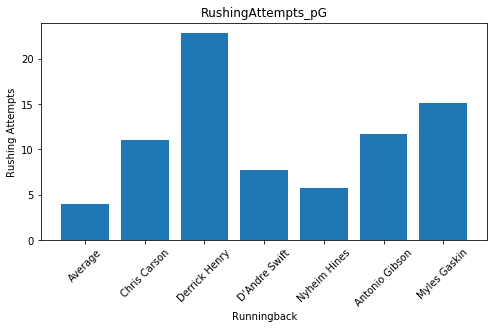

----------------------------------------
Defense

Avg Rushing_Att_pG: 26.94
Chicago Bears Rushing_Att_pG: 28.85
--------------------------------------------------
Avg Rushing_Att_pG: 26.94
Detroit Lions Rushing_Att_pG: 30.15
--------------------------------------------------
Avg Rushing_Att_pG: 26.94
Tennessee Titans Rushing_Att_pG: 26.62
--------------------------------------------------
Avg Rushing_Att_pG: 26.94
Houston Texans Rushing_Att_pG: 30.46
--------------------------------------------------
Avg Rushing_Att_pG: 26.94
Seattle Seahawks Rushing_Att_pG: 24.54
--------------------------------------------------
Avg Rushing_Att_pG: 26.94
New England Patriots Rushing_Att_pG: 28.15
--------------------------------------------------


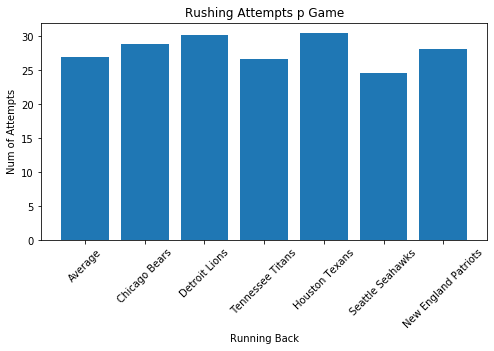

In [54]:
print('Running Backs')
print('')
average, rb_1, _1rb = print_metric(available_rbs, 'RushingAttempts_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'RushingAttempts_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'RushingAttempts_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'RushingAttempts_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'RushingAttempts_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'RushingAttempts_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'RushingAttempts_pG', 'Runningback', 'Rushing Attempts')

print('-'*40)
print('Defense')
print('')

average, team_rb1, rbteam1 = print_metric_team(defense, 'Rushing_Att_pG', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Rushing_Att_pG', teamRB2)
average, team_rb3, rbteam3 = print_metric_team(defense, 'Rushing_Att_pG', teamRB3)
average, team_rb4, rbteam4 = print_metric_team(defense, 'Rushing_Att_pG', teamRB4)
average, team_rb5, rbteam5 = print_metric_team(defense, 'Rushing_Att_pG', teamRB5)
average, team_rb6, rbteam6 = print_metric_team(defense, 'Rushing_Att_pG', teamRB6)

x = ['Average', team_rb1, team_rb2, team_rb3, team_rb4, team_rb5, team_rb6]
y = [average, rbteam1, rbteam2, rbteam3, rbteam4, rbteam5, rbteam6]

bar_plot(x, y, 'Rushing Attempts p Game', 'Running Back', 'Num of Attempts')

Running Backs

Avg RushingYds_pG: 16.12
Chris Carson RushingYds_pG: 56.11
--------------------------------------------------
Avg RushingYds_pG: 16.12
Derrick Henry RushingYds_pG: 117.85
--------------------------------------------------
Avg RushingYds_pG: 16.12
D'Andre Swift RushingYds_pG: 35.5
--------------------------------------------------
Avg RushingYds_pG: 16.12
Nyheim Hines RushingYds_pG: 21.23
--------------------------------------------------
Avg RushingYds_pG: 16.12
Antonio Gibson RushingYds_pG: 54.92
--------------------------------------------------
Avg RushingYds_pG: 16.12
Myles Gaskin RushingYds_pG: 59.62
--------------------------------------------------


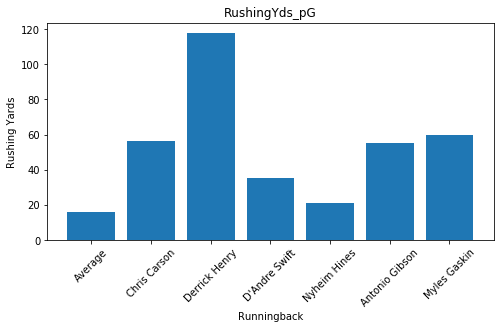

----------------------------------------
Defense

Avg Rushing_Yds_pG: 116.87
Chicago Bears Rushing_Yds_pG: 115.46
--------------------------------------------------
Avg Rushing_Yds_pG: 116.87
Detroit Lions Rushing_Yds_pG: 132.85
--------------------------------------------------
Avg Rushing_Yds_pG: 116.87
Tennessee Titans Rushing_Yds_pG: 113.85
--------------------------------------------------
Avg Rushing_Yds_pG: 116.87
Houston Texans Rushing_Yds_pG: 152.31
--------------------------------------------------
Avg Rushing_Yds_pG: 116.87
Seattle Seahawks Rushing_Yds_pG: 95.46
--------------------------------------------------
Avg Rushing_Yds_pG: 116.87
New England Patriots Rushing_Yds_pG: 124.0
--------------------------------------------------


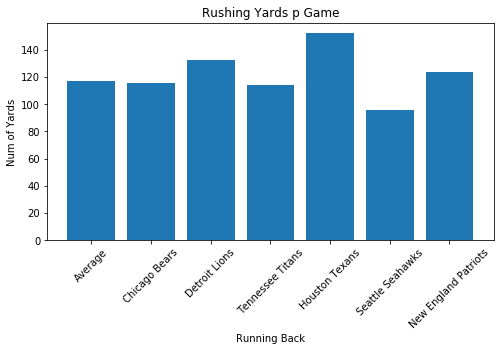

In [55]:
print('Running Backs')
print('')
average, rb_1, _1rb = print_metric(available_rbs, 'RushingYds_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'RushingYds_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'RushingYds_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'RushingYds_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'RushingYds_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'RushingYds_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'RushingYds_pG', 'Runningback', 'Rushing Yards')

print('-'*40)
print('Defense')
print('')

average, team_rb1, rbteam1 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB2)
average, team_rb3, rbteam3 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB3)
average, team_rb4, rbteam4 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB4)
average, team_rb5, rbteam5 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB5)
average, team_rb6, rbteam6 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB6)

x = ['Average', team_rb1, team_rb2, team_rb3, team_rb4, team_rb5, team_rb6]
y = [average, rbteam1, rbteam2, rbteam3, rbteam4, rbteam5, rbteam6]

bar_plot(x, y, 'Rushing Yards p Game', 'Running Back', 'Num of Yards')

Running Backs

Avg RushingTDs_pG: 0.1
Chris Carson RushingTDs_pG: 0.56
--------------------------------------------------
Avg RushingTDs_pG: 0.1
Derrick Henry RushingTDs_pG: 1.08
--------------------------------------------------
Avg RushingTDs_pG: 0.1
D'Andre Swift RushingTDs_pG: 0.5
--------------------------------------------------
Avg RushingTDs_pG: 0.1
Nyheim Hines RushingTDs_pG: 0.23
--------------------------------------------------
Avg RushingTDs_pG: 0.1
Antonio Gibson RushingTDs_pG: 0.92
--------------------------------------------------
Avg RushingTDs_pG: 0.1
Myles Gaskin RushingTDs_pG: 0.25
--------------------------------------------------


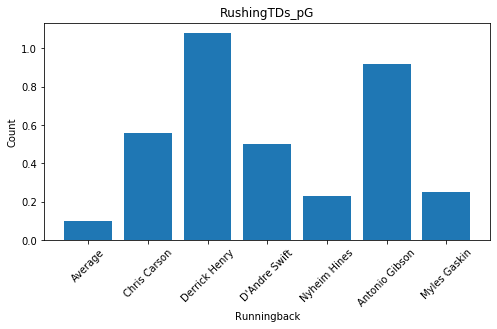

----------------------------------------
Defense

Avg Rushing_TDs_pG: 1.0
Chicago Bears Rushing_TDs_pG: 0.69
--------------------------------------------------
Avg Rushing_TDs_pG: 1.0
Detroit Lions Rushing_TDs_pG: 1.62
--------------------------------------------------
Avg Rushing_TDs_pG: 1.0
Tennessee Titans Rushing_TDs_pG: 1.0
--------------------------------------------------
Avg Rushing_TDs_pG: 1.0
Houston Texans Rushing_TDs_pG: 1.31
--------------------------------------------------
Avg Rushing_TDs_pG: 1.0
Seattle Seahawks Rushing_TDs_pG: 1.23
--------------------------------------------------
Avg Rushing_TDs_pG: 1.0
New England Patriots Rushing_TDs_pG: 0.92
--------------------------------------------------


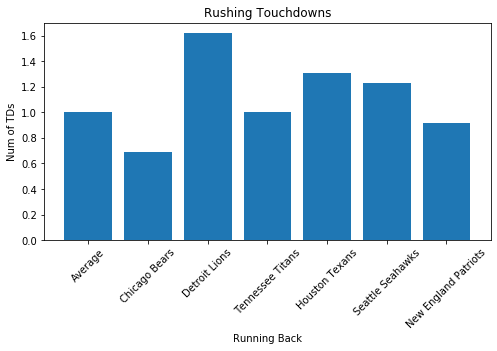

In [56]:
print('Running Backs')
print('')
average, rb_1, _1rb = print_metric(available_rbs, 'RushingTDs_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'RushingTDs_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'RushingTDs_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'RushingTDs_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'RushingTDs_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'RushingTDs_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'RushingTDs_pG', 'Runningback', 'Count')

print('-'*40)
print('Defense')
print('')

average, team_rb1, rbteam1 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB2)
average, team_rb3, rbteam3 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB3)
average, team_rb4, rbteam4 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB4)
average, team_rb5, rbteam5 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB5)
average, team_rb6, rbteam6 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB6)

x = ['Average', team_rb1, team_rb2, team_rb3, team_rb4, team_rb5, team_rb6]
y = [average, rbteam1, rbteam2, rbteam3, rbteam4, rbteam5, rbteam6]

bar_plot(x, y, 'Rushing Touchdowns', 'Running Back', 'Num of TDs')

Running Backs

Avg LostFumbles_pG: 0.02
Chris Carson LostFumbles_pG: 0.0
--------------------------------------------------
Avg LostFumbles_pG: 0.02
Derrick Henry LostFumbles_pG: 0.08
--------------------------------------------------
Avg LostFumbles_pG: 0.02
D'Andre Swift LostFumbles_pG: 0.0
--------------------------------------------------
Avg LostFumbles_pG: 0.02
Nyheim Hines LostFumbles_pG: 0.0
--------------------------------------------------
Avg LostFumbles_pG: 0.02
Antonio Gibson LostFumbles_pG: 0.17
--------------------------------------------------
Avg LostFumbles_pG: 0.02
Myles Gaskin LostFumbles_pG: 0.25
--------------------------------------------------


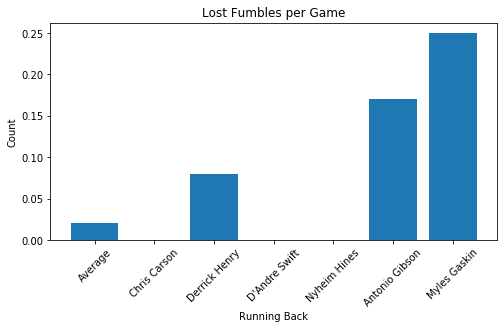

----------------------------------------
Defense

Avg Fumbles_pG: 0.54
Chicago Bears Fumbles_pG: 0.54
--------------------------------------------------
Avg Fumbles_pG: 0.54
Detroit Lions Fumbles_pG: 0.38
--------------------------------------------------
Avg Fumbles_pG: 0.54
Tennessee Titans Fumbles_pG: 0.46
--------------------------------------------------
Avg Fumbles_pG: 0.54
Houston Texans Fumbles_pG: 0.38
--------------------------------------------------
Avg Fumbles_pG: 0.54
Seattle Seahawks Fumbles_pG: 0.54
--------------------------------------------------
Avg Fumbles_pG: 0.54
New England Patriots Fumbles_pG: 0.31
--------------------------------------------------


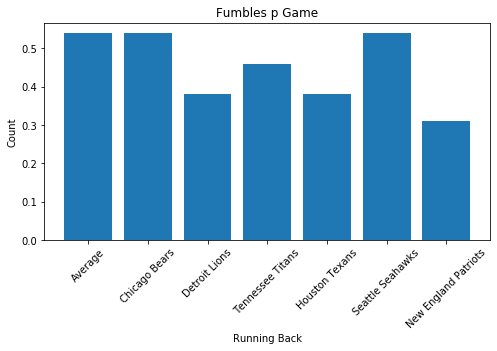

In [57]:
print('Running Backs')
print('')
average, rb_1, _1rb = print_metric(available_rbs, 'LostFumbles_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'LostFumbles_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'LostFumbles_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'LostFumbles_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'LostFumbles_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'LostFumbles_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'Lost Fumbles per Game', 'Running Back', 'Count')

print('-'*40)
print('Defense')
print('')

average, team_rb1, rbteam1 = print_metric_team(defense, 'Fumbles_pG', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Fumbles_pG', teamRB2)
average, team_rb3, rbteam3 = print_metric_team(defense, 'Fumbles_pG', teamRB3)
average, team_rb4, rbteam4 = print_metric_team(defense, 'Fumbles_pG', teamRB4)
average, team_rb5, rbteam5 = print_metric_team(defense, 'Fumbles_pG', teamRB5)
average, team_rb6, rbteam6 = print_metric_team(defense, 'Fumbles_pG', teamRB6)

x = ['Average', team_rb1, team_rb2, team_rb3, team_rb4, team_rb5, team_rb6]
y = [average, rbteam1, rbteam2, rbteam3, rbteam4, rbteam5, rbteam6]

bar_plot(x, y, 'Fumbles p Game', 'Running Back', 'Count')

#### Additional Running Back Analysis

Avg Targeted_pG: 1.38
Chris Carson Targeted_pG: 4.22
--------------------------------------------------
Avg Targeted_pG: 1.38
Derrick Henry Targeted_pG: 2.23
--------------------------------------------------
Avg Targeted_pG: 1.38
D'Andre Swift Targeted_pG: 4.4
--------------------------------------------------
Avg Targeted_pG: 1.38
Nyheim Hines Targeted_pG: 4.77
--------------------------------------------------
Avg Targeted_pG: 1.38
Antonio Gibson Targeted_pG: 3.25
--------------------------------------------------
Avg Targeted_pG: 1.38
Myles Gaskin Targeted_pG: 4.62
--------------------------------------------------


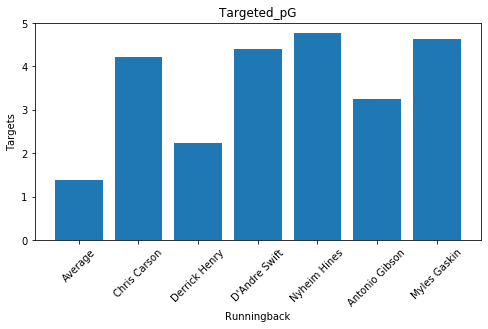

In [58]:
average, rb_1, _1rb = print_metric(available_rbs, 'Targeted_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'Targeted_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'Targeted_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'Targeted_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'Targeted_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'Targeted_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'Targeted_pG', 'Runningback', 'Targets')

Avg Receptions_pG: 1.05
Chris Carson Receptions_pG: 3.33
--------------------------------------------------
Avg Receptions_pG: 1.05
Derrick Henry Receptions_pG: 1.31
--------------------------------------------------
Avg Receptions_pG: 1.05
D'Andre Swift Receptions_pG: 3.5
--------------------------------------------------
Avg Receptions_pG: 1.05
Nyheim Hines Receptions_pG: 3.92
--------------------------------------------------
Avg Receptions_pG: 1.05
Antonio Gibson Receptions_pG: 2.67
--------------------------------------------------
Avg Receptions_pG: 1.05
Myles Gaskin Receptions_pG: 4.0
--------------------------------------------------


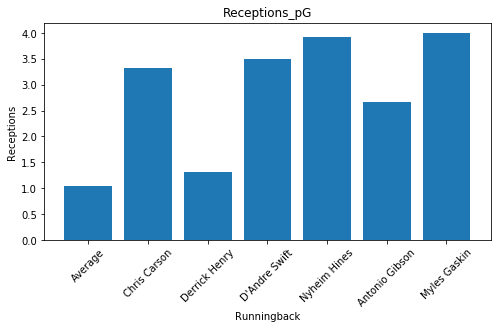

In [59]:
average, rb_1, _1rb = print_metric(available_rbs, 'Receptions_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'Receptions_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'Receptions_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'Receptions_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'Receptions_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'Receptions_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'Receptions_pG', 'Runningback', 'Receptions')


## Tight End

In [60]:
tight_ends = offense[offense['Position'] == 'TE']

In [61]:
per_week_stats(tight_ends, 'Targeted', 'Games')
per_week_stats(tight_ends, 'Receptions', 'Games')
per_week_stats(tight_ends, 'ReceivingYds', 'Games')
per_week_stats(tight_ends, 'ReceivingTDs', 'Games')
per_week_stats(tight_ends, 'LostFumbles', 'Games')

In [62]:
tight_ends.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
4,Travis Kelce,KAN,TE,31,13,13,1,2,4,0,0,0,0,0.00,0,120,90,1250,21.90,9,1,1,9,0,0,222.20,1,5,177.20,11.00,15.00,8.70,7.00,16.80,16.50,3.10,16.90,15.90,0.00,18.90,8.20,19.60,19.60,9.23,6.92,96.15,0.69,0.08
18,Darren Waller,LVR,TE,28,13,12,0,0,0,0,0,0,0,0.00,0,117,84,817,16.30,7,1,1,7,0,0,163.70,2,19,121.70,4.50,16.30,0.90,6.80,10.80,0.00,11.00,2.80,8.20,3.70,14.80,2.30,32.00,7.50,9.00,6.46,62.85,0.54,0.08
33,Robert Tonyan,GNB,TE,26,13,8,0,0,0,0,0,0,0,0.00,0,52,46,533,16.90,9,0,0,9,0,0,130.30,3,34,107.30,0.00,8.50,11.00,27.80,0.00,2.50,3.20,7.90,0.50,3.30,10.40,12.70,9.90,9.60,4.00,3.54,41.00,0.69,0.00
37,T.J. Hockenson,DET,TE,23,13,13,0,0,0,0,0,0,0,0.00,0,88,58,657,14.30,6,0,0,6,1,0,132.70,4,38,103.70,11.60,6.20,5.30,8.90,0.00,7.70,11.90,6.50,9.90,1.30,6.80,8.90,8.40,10.30,6.77,4.46,50.54,0.46,0.00
45,Mike Gesicki,MIA,TE,25,13,9,0,0,0,0,0,0,0,0.00,0,68,44,602,19.80,6,0,0,6,0,0,118.20,5,46,96.20,3.00,19.00,7.50,1.50,9.10,0.00,0.00,0.80,4.20,4.00,4.30,9.50,14.80,18.50,5.23,3.38,46.31,0.46,0.00


In [63]:
tight_ends[tight_ends['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
59,Rob Gronkowski,TAM,TE,31,13,13,0,0,0,0,0,0,0,0.00,0,64,38,507,16.40,5,1,0,5,0,0,99.70,8,60,80.70,1.10,0.00,4.80,2.90,5.20,13.80,12.20,10.10,0.20,11.10,2.50,10.60,0.00,6.20,4.92,2.92,39.00,0.38,0.00


In [64]:
available_te = tight_ends[~tight_ends['Player'].isin(taken_wrt)]

In [65]:
scaled_te = available_te[['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted', 'Targeted_pG', 
                          'Receptions_pG', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']]

te_columns = ['Targeted_pG', 'Receptions_pG', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']

scale_data(scaled_te, te_columns)

scaled_te.head()

,Player,Team,Position,Age,Games,GamesStarted,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
33,Robert Tonyan,GNB,TE,26,13,8,1.39,2.16,2.40,3.80,-0.33
54,Jonnu Smith,TEN,TE,25,12,11,1.55,1.33,1.44,3.06,-0.33
59,Rob Gronkowski,TAM,TE,31,13,13,1.99,1.58,2.22,1.72,-0.33
60,Logan Thomas,WAS,TE,29,13,12,2.58,2.38,1.97,1.72,-0.33
147,Jimmy Graham,CHI,TE,34,13,12,2.09,1.87,1.24,2.24,-0.33


In [66]:
scaled_te['Combined_Score'] = (scaled_te['Targeted_pG'] + scaled_te['Receptions_pG'] + 
                               scaled_te['ReceivingYds_pG'] + scaled_te['ReceivingTDs_pG'] -
                               scaled_te['LostFumbles_pG'])

scaled_te.sort_values('Combined_Score', ascending = False, inplace = True)
scaled_te.head(10)

,Player,Team,Position,Age,Games,GamesStarted,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG,Combined_Score
350,C.J. Uzomah,CIN,TE,27,2,2,2.36,2.60,2.61,2.50,-0.33,10.39
33,Robert Tonyan,GNB,TE,26,13,8,1.39,2.16,2.40,3.80,-0.33,10.07
60,Logan Thomas,WAS,TE,29,13,12,2.58,2.38,1.97,1.72,-0.33,8.97
288,O.J. Howard,TAM,TE,26,4,1,1.88,1.41,2.01,2.50,-0.33,8.12
59,Rob Gronkowski,TAM,TE,31,13,13,1.99,1.58,2.22,1.72,-0.33,7.83
147,Jimmy Graham,CHI,TE,34,13,12,2.09,1.87,1.24,2.24,-0.33,7.75
54,Jonnu Smith,TEN,TE,25,12,11,1.55,1.33,1.44,3.06,-0.33,7.71
157,Hayden Hurst,ATL,TE,27,13,9,2.33,1.94,2.01,0.68,-0.33,7.29
238,Jordan Reed,SFO,TE,30,8,1,1.96,1.65,1.17,1.65,-0.33,6.75
153,Dalton Schultz,DAL,TE,24,13,11,2.43,2.52,2.24,0.68,1.72,6.15


In [67]:
te1 = 60
te2 = 59
te3 = 147
te4 = 54

Week 13 Opponents:
    
    Washington Football Team vs Seattle Seahawks
    Tampa Bay Buccaneers vs Atlanta Falcons
    Chicago Bears vs Minnesota Vikings
    Tennessee Titans vs Detroit Lions

In [68]:
te_opp = ['Seattle Seahawks', 'Atlanta Falcons', 'Minnesota Vikings', 'Detroit Lions']
defense[defense['Team'].isin(te_opp)]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
15,Atlanta Falcons,13,322,838,6.10,5078,319,1415,4.40,12,494,7.10,344,11.20,3663,26,44,30,68.20,18,9,9,25,66.00,-1.00,3.00,5.00,0.00,0.00,7.00,2.00,6.00,3.00,0.00,5.00,28.00,4.00,4.00,24.77,390.62,24.54,108.85,0.92,38.00,26.46,0.70,281.77,2.00,2.92,1.38,0.69,1.92,5.08
17,Seattle Seahawks,13,324,894,5.70,5074,319,1241,3.90,16,539,6.70,363,11.00,3833,21,48,31,64.60,18,11,7,36,80.00,6.00,3.00,9.00,5.00,7.00,0.00,0.00,7.00,3.00,5.00,5.00,9.00,9.00,12.00,24.92,390.31,24.54,95.46,1.23,41.46,27.92,0.67,294.85,1.62,2.85,1.38,0.54,2.77,6.15
23,Minnesota Vikings,13,355,845,5.80,4895,363,1559,4.30,8,461,6.90,302,11.40,3336,26,44,23,52.30,17,11,6,21,57.00,-4.00,3.00,2.00,5.00,6.00,0.00,0.00,3.00,9.00,10.00,4.00,5.00,13.00,0.00,27.31,376.54,27.92,119.92,0.62,35.46,23.23,0.66,256.62,2.00,2.62,1.31,0.46,1.62,4.38
28,Detroit Lions,13,389,858,6.00,5157,392,1727,4.40,21,448,7.40,303,11.80,3430,26,51,36,70.60,12,7,5,18,27.00,1.00,-3.00,7.00,0.00,0.00,6.00,4.00,-2.00,0.00,4.00,6.00,0.00,5.00,-1.00,29.92,396.69,30.15,132.85,1.62,34.46,23.31,0.68,263.85,2.00,3.62,0.92,0.38,1.38,2.08


In [69]:
teamTE1 = 17
teamTE2 = 15
teamTE3 = 23
teamTE4 = 28

#### Tight End Comparison

Tight Ends

Avg Targeted_pG: 1.83
Logan Thomas Targeted_pG: 5.85
--------------------------------------------------
Avg Targeted_pG: 1.83
Rob Gronkowski Targeted_pG: 4.92
--------------------------------------------------
Avg Targeted_pG: 1.83
Jimmy Graham Targeted_pG: 5.08
--------------------------------------------------
Avg Targeted_pG: 1.83
Jonnu Smith Targeted_pG: 4.25
--------------------------------------------------


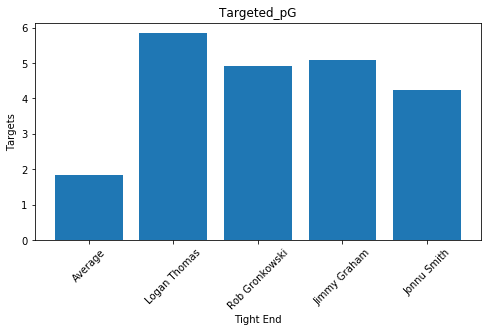

----------------------------------------
Defense

Avg Passing_Att_pG: 35.22
Seattle Seahawks Passing_Att_pG: 41.46
--------------------------------------------------
Avg Passing_Att_pG: 35.22
Atlanta Falcons Passing_Att_pG: 38.0
--------------------------------------------------
Avg Passing_Att_pG: 35.22
Minnesota Vikings Passing_Att_pG: 35.46
--------------------------------------------------
Avg Passing_Att_pG: 35.22
Detroit Lions Passing_Att_pG: 34.46
--------------------------------------------------


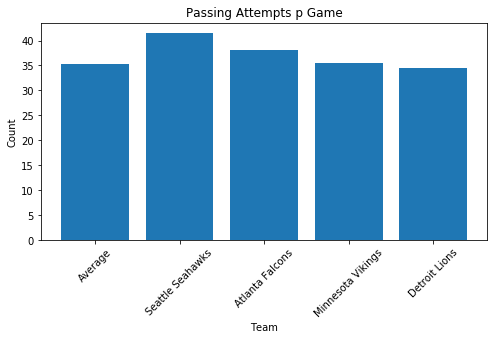

In [70]:
print('Tight Ends')
print('')
average, te_1, _1te = print_metric(available_te, 'Targeted_pG', te1)
average, te_2, _2te = print_metric(available_te, 'Targeted_pG', te2)
average, te_3, _3te = print_metric(available_te, 'Targeted_pG', te3)
average, te_4, _4te = print_metric(available_te, 'Targeted_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'Targeted_pG', 'Tight End', 'Targets')

print('-'*40)
print('Defense')
print('')

average, te_team1, te_def1 = print_metric_team(defense, 'Passing_Att_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Passing_Att_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Passing_Att_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Passing_Att_pG', teamTE4)

x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Passing Attempts p Game', 'Team', 'Count')

Tight Ends

Avg Receptions_pG: 1.26
Logan Thomas Receptions_pG: 3.77
--------------------------------------------------
Avg Receptions_pG: 1.26
Rob Gronkowski Receptions_pG: 2.92
--------------------------------------------------
Avg Receptions_pG: 1.26
Jimmy Graham Receptions_pG: 3.23
--------------------------------------------------
Avg Receptions_pG: 1.26
Jonnu Smith Receptions_pG: 2.67
--------------------------------------------------


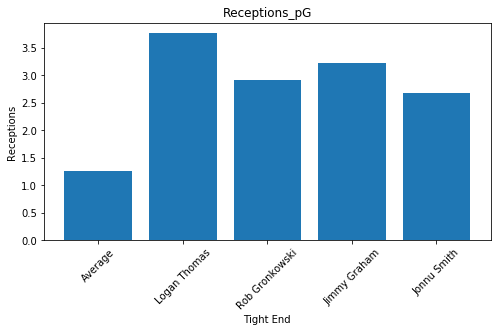

----------------------------------------
Defense

Avg Completions_pG: 23.04
Seattle Seahawks Completions_pG: 27.92
--------------------------------------------------
Avg Completions_pG: 23.04
Atlanta Falcons Completions_pG: 26.46
--------------------------------------------------
Avg Completions_pG: 23.04
Minnesota Vikings Completions_pG: 23.23
--------------------------------------------------
Avg Completions_pG: 23.04
Detroit Lions Completions_pG: 23.31
--------------------------------------------------


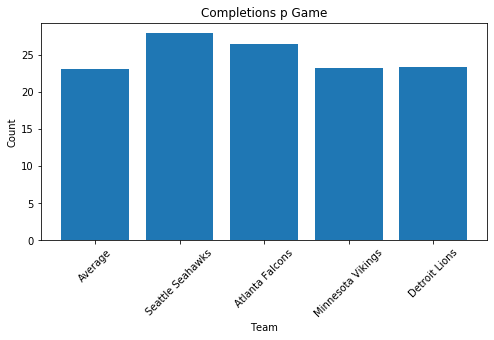

In [71]:
print('Tight Ends')
print('')
average, te_1, _1te = print_metric(available_te, 'Receptions_pG', te1)
average, te_2, _2te = print_metric(available_te, 'Receptions_pG', te2)
average, te_3, _3te = print_metric(available_te, 'Receptions_pG', te3)
average, te_4, _4te = print_metric(available_te, 'Receptions_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'Receptions_pG', 'Tight End', 'Receptions')

print('-'*40)
print('Defense')
print('')

average, te_team1, te_def1 = print_metric_team(defense, 'Completions_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Completions_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Completions_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Completions_pG', teamTE4)

x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Completions p Game', 'Team', 'Count')

Tight Ends

Avg ReceivingYds_pG: 13.0
Logan Thomas ReceivingYds_pG: 36.08
--------------------------------------------------
Avg ReceivingYds_pG: 13.0
Rob Gronkowski ReceivingYds_pG: 39.0
--------------------------------------------------
Avg ReceivingYds_pG: 13.0
Jimmy Graham ReceivingYds_pG: 27.46
--------------------------------------------------
Avg ReceivingYds_pG: 13.0
Jonnu Smith ReceivingYds_pG: 29.83
--------------------------------------------------


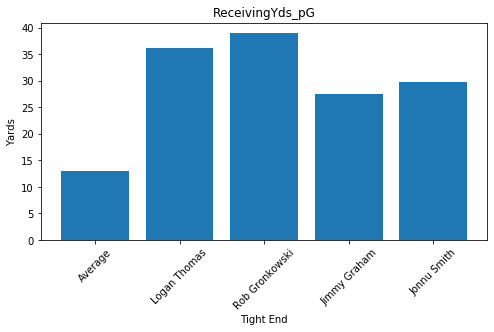

----------------------------------------
Defense

Avg Passing_Yds_pG: 239.3
Seattle Seahawks Passing_Yds_pG: 294.85
--------------------------------------------------
Avg Passing_Yds_pG: 239.3
Atlanta Falcons Passing_Yds_pG: 281.77
--------------------------------------------------
Avg Passing_Yds_pG: 239.3
Minnesota Vikings Passing_Yds_pG: 256.62
--------------------------------------------------
Avg Passing_Yds_pG: 239.3
Detroit Lions Passing_Yds_pG: 263.85
--------------------------------------------------


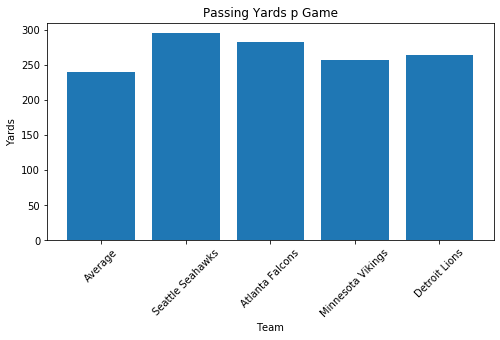

In [72]:
print('Tight Ends')
print('')
average, te_1, _1te = print_metric(available_te, 'ReceivingYds_pG', te1)
average, te_2, _2te = print_metric(available_te, 'ReceivingYds_pG', te2)
average, te_3, _3te = print_metric(available_te, 'ReceivingYds_pG', te3)
average, te_4, _4te = print_metric(available_te, 'ReceivingYds_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'ReceivingYds_pG', 'Tight End', 'Yards')

print('-'*40)
print('Defense')
print('')

average, te_team1, te_def1 = print_metric_team(defense, 'Passing_Yds_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Passing_Yds_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Passing_Yds_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Passing_Yds_pG', teamTE4)


x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Passing Yards p Game', 'Team', 'Yards')

Tight Ends

Avg ReceivingTDs_pG: 0.13
Logan Thomas ReceivingTDs_pG: 0.38
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Rob Gronkowski ReceivingTDs_pG: 0.38
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Jimmy Graham ReceivingTDs_pG: 0.46
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Jonnu Smith ReceivingTDs_pG: 0.58
--------------------------------------------------


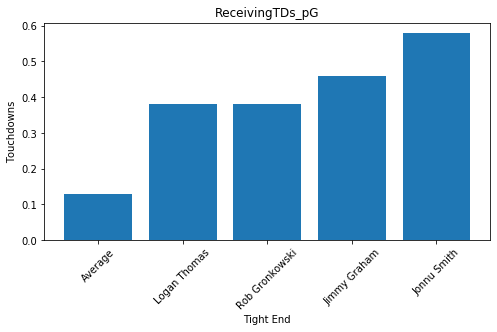

----------------------------------------
Defense

Avg Passing_TDs_pG: 1.69
Seattle Seahawks Passing_TDs_pG: 1.62
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Atlanta Falcons Passing_TDs_pG: 2.0
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Minnesota Vikings Passing_TDs_pG: 2.0
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Detroit Lions Passing_TDs_pG: 2.0
--------------------------------------------------


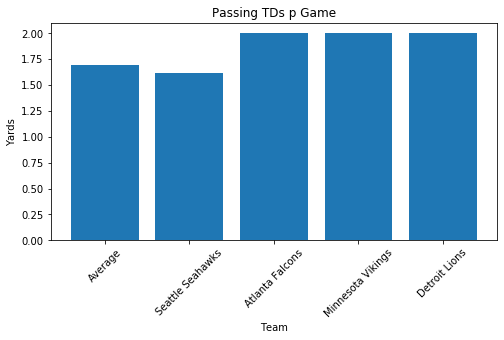

In [73]:
print('Tight Ends')
print('')
average, te_1, _1te = print_metric(available_te, 'ReceivingTDs_pG', te1)
average, te_2, _2te = print_metric(available_te, 'ReceivingTDs_pG', te2)
average, te_3, _3te = print_metric(available_te, 'ReceivingTDs_pG', te3)
average, te_4, _4te = print_metric(available_te, 'ReceivingTDs_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'ReceivingTDs_pG', 'Tight End', 'Touchdowns')

print('-'*40)
print('Defense')
print('')

average, te_team1, te_def1 = print_metric_team(defense, 'Passing_TDs_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Passing_TDs_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Passing_TDs_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Passing_TDs_pG', teamTE4)

x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Passing TDs p Game', 'Team', 'Yards')



## Wide Receiver

In [74]:
wrs = offense[offense['Position'] == 'WR']

In [75]:
per_week_stats(wrs, 'Targeted', 'Games')
per_week_stats(wrs, 'Receptions', 'Games')
wrs['Catch_Rate'] = wrs['Receptions_pG']/wrs['Targeted_pG']
per_week_stats(wrs, 'ReceivingYds', 'Games')
per_week_stats(wrs, 'ReceivingTDs', 'Games')
per_week_stats(wrs, 'LostFumbles', 'Games')

In [76]:
wrs[wrs['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
24,DeAndre Hopkins,ARI,WR,28,13,13,0,0,0,0,0,0,0,0.00,0,127,94,1155,14.90,5,1,1,5,0,0,190.50,8,25,143.50,15.10,12.80,13.70,4.10,19.10,7.30,14.30,0.00,3.00,18.70,5.10,5.50,11.20,13.60,9.77,7.23,0.74,88.85,0.38,0.08
56,Robby Anderson,CAR,WR,27,13,13,0,0,0,0,0,3,16,8.30,0,114,83,996,12.00,2,1,1,2,1,0,154.70,20,57,113.30,19.50,8.90,5.50,9.90,11.50,7.70,7.40,4.80,6.30,2.10,4.60,15.40,0.00,9.70,8.77,6.38,0.73,76.62,0.15,0.08
58,Tyler Boyd,CIN,WR,26,13,8,1,2,16,0,0,4,38,14.00,0,106,78,840,17.70,4,1,0,4,0,0,151.40,22,59,112.40,3.30,13.20,12.50,9.40,4.20,7.90,16.70,13.60,0.00,4.10,8.50,1.50,13.20,4.30,8.15,6.00,0.74,64.62,0.31,0.00
69,Corey Davis,TEN,WR,25,11,9,0,0,0,0,0,0,0,0.00,0,73,56,835,23.10,4,1,1,4,0,0,133.50,28,70,105.50,10.10,9.60,6.90,0.00,0.00,0.00,9.50,18.80,0.00,6.70,11.30,7.00,24.20,1.40,6.64,5.09,0.77,75.91,0.36,0.09
105,Brandin Cooks,HOU,WR,27,12,12,0,0,0,0,0,0,0,0.00,0,86,57,784,20.50,3,0,0,3,0,0,124.90,34,,96.40,2.00,9.50,2.30,0.00,22.10,12.80,6.00,0.00,14.30,3.90,8.50,8.50,6.50,0.00,7.17,4.75,0.66,65.33,0.25,0.00
107,Julio Jones,ATL,WR,31,9,9,0,0,0,0,0,0,0,0.00,0,68,51,771,16.20,3,0,0,3,0,0,120.60,35,,95.10,15.70,2.40,0.00,3.20,0.00,25.70,9.70,13.70,11.40,0.00,3.90,0.00,9.40,0.00,7.56,5.67,0.75,85.67,0.33,0.00


In [77]:
available_wrs = wrs[~wrs['Player'].isin(taken_wrt)]
available_wrs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
24,DeAndre Hopkins,ARI,WR,28,13,13,0,0,0,0,0,0,0,0.00,0,127,94,1155,14.90,5,1,1,5,0,0,190.50,8,25,143.50,15.10,12.80,13.70,4.10,19.10,7.30,14.30,0.00,3.00,18.70,5.10,5.50,11.20,13.60,9.77,7.23,0.74,88.85,0.38,0.08
47,Chase Claypool,PIT,WR,22,13,4,0,0,0,0,0,9,22,6.40,2,84,50,664,15.80,8,3,1,10,0,0,151.60,17,48,126.60,4.70,14.80,2.40,0.00,35.60,14.10,0.20,8.20,7.30,17.30,11.90,5.20,3.80,1.50,6.46,3.85,0.60,51.08,0.62,0.08
56,Robby Anderson,CAR,WR,27,13,13,0,0,0,0,0,3,16,8.30,0,114,83,996,12.00,2,1,1,2,1,0,154.70,20,57,113.30,19.50,8.90,5.50,9.90,11.50,7.70,7.40,4.80,6.30,2.10,4.60,15.40,0.00,9.70,8.77,6.38,0.73,76.62,0.15,0.08
57,Cole Beasley,BUF,WR,31,13,9,1,1,20,1,0,0,0,0.00,0,92,71,838,19.00,4,0,0,4,0,0,148.10,21,58,112.60,5.80,7.00,10.00,9.20,5.30,10.50,11.20,2.40,3.90,16.90,0.00,7.30,19.00,4.10,7.08,5.46,0.77,64.46,0.31,0.00
58,Tyler Boyd,CIN,WR,26,13,8,1,2,16,0,0,4,38,14.00,0,106,78,840,17.70,4,1,0,4,0,0,151.40,22,59,112.40,3.30,13.20,12.50,9.40,4.20,7.90,16.70,13.60,0.00,4.10,8.50,1.50,13.20,4.30,8.15,6.00,0.74,64.62,0.31,0.00


In [78]:
scaled_wrs = available_wrs[['Player', 'Team', 'Position', 'Games', 'GamesStarted', 'Targeted_pG', 'Receptions_pG', 
                            'Catch_Rate', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']]

wr_columns = ['Targeted_pG', 'Receptions_pG', 'Catch_Rate', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']

scale_data(scaled_wrs, wr_columns)

scaled_wrs.head()

,Player,Team,Position,Games,GamesStarted,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
24,DeAndre Hopkins,ARI,WR,13,13,2.88,3.36,0.47,3.13,1.67,1.00
47,Chase Claypool,PIT,WR,13,4,1.45,1.18,-0.39,1.28,3.17,1.00
56,Robby Anderson,CAR,WR,13,13,2.44,2.82,0.39,2.53,0.17,1.00
57,Cole Beasley,BUF,WR,13,9,1.71,2.22,0.65,1.94,1.17,-0.34
58,Tyler Boyd,CIN,WR,13,8,2.18,2.57,0.44,1.95,1.17,-0.34


In [79]:
scaled_wrs['Combined_Score'] = (scaled_wrs['Targeted_pG'] + scaled_wrs['Receptions_pG'] + 
                                scaled_wrs['Catch_Rate'] + scaled_wrs['ReceivingYds_pG'] + 
                                scaled_wrs['ReceivingTDs_pG'] - scaled_wrs['LostFumbles_pG'])

scaled_wrs.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_wrs.head(10)

,Player,Team,Position,Games,GamesStarted,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG,Combined_Score
24,DeAndre Hopkins,ARI,WR,13,13,2.88,3.36,0.47,3.13,1.67,1.00,10.50
107,Julio Jones,ATL,WR,9,9,1.92,2.36,0.52,2.97,1.34,-0.34,9.46
58,Tyler Boyd,CIN,WR,13,8,2.18,2.57,0.44,1.95,1.17,-0.34,8.65
126,Jamison Crowder,NYJ,WR,9,5,1.97,1.71,-0.31,1.56,2.78,-0.34,8.05
57,Cole Beasley,BUF,WR,13,9,1.71,2.22,0.65,1.94,1.17,-0.34,8.04
64,Brandon Aiyuk,SFO,WR,10,9,2.16,1.93,-0.26,2.01,1.77,-0.34,7.95
339,Chad Hansen,HOU,WR,2,0,1.68,2.57,1.16,2.62,-0.83,-0.34,7.55
56,Robby Anderson,CAR,WR,13,13,2.44,2.82,0.39,2.53,0.17,1.00,7.36
69,Corey Davis,TEN,WR,11,9,1.52,1.99,0.63,2.50,1.53,1.24,6.92
105,Brandin Cooks,HOU,WR,12,12,1.75,1.77,0.01,1.98,0.80,-0.34,6.65


In [81]:
wr1 = 24
wr2 = 107
wr3 = 58
wr4 = 126
wr5 = 57
wr6 = 64
wr7 = 56
wr8 = 69

Week 15 Opponents:

    Arizona Cardinals vs Philadelphia Eagles
    Atlanta Falcons vs Tampa Bay Buccaneers
    Cincinnati Bengals vs Pittsburgh Steelers
    New York Jets vs LA Rams
    Buffalo Bills vs Denver Broncos
    San Francisco 49ers vs Dallas Cowboys
    Carolina Panthers vs Green Bay Packeers
    Tennessee Titans vs Detroit Lions

In [83]:
wr_opp = ['Philadelphia Eagles', 'Tampa Bay Buccaneers', 'Pittsburgh Steelers', 'Los Angeles Rams', 'Denver Broncos', 
          'Dallas Cowboys', 'Green Bay Packers', 'Detroit Lions']
defense[defense['Team'].isin(list(wr_opp))]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
0,Pittsburgh Steelers,13,237,811,4.90,3940,314,1312,4.20,7,452,5.30,253,11.60,2628,19,35,19,54.30,25,17,8,45,133.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00,18.00,7.00,12.00,17.00,14.00,3.00,6.00,18.23,303.08,24.15,100.92,0.54,34.77,19.46,0.56,202.15,1.46,2.00,1.92,0.62,3.46,10.23
2,Los Angeles Rams,13,246,815,4.60,3716,315,1224,3.90,10,458,5.00,286,9.70,2492,14,37,22,59.50,21,13,8,42,123.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00,5.00,0.00,13.00,5.00,15.00,11.00,21.00,18.92,285.85,24.23,94.15,0.77,35.23,22.00,0.62,191.69,1.08,1.85,1.62,0.62,3.23,9.46
10,Tampa Bay Buccaneers,13,294,837,5.10,4294,304,1052,3.50,9,493,6.10,342,10.30,3242,24,42,26,61.90,21,14,7,40,97.00,0.00,14.00,16.00,6.00,6.00,19.00,6.00,7.00,1.00,5.00,4.00,4.00,0.00,9.00,22.62,330.31,23.38,80.92,0.69,37.92,26.31,0.69,249.38,1.85,2.54,1.62,0.54,3.08,7.46
16,Green Bay Packers,13,323,780,5.60,4364,312,1426,4.60,13,433,6.30,281,11.30,2938,22,40,27,67.50,13,8,5,35,75.00,5.00,12.00,3.00,5.00,0.00,-1.00,6.00,0.00,6.00,6.00,4.00,15.00,10.00,4.00,24.85,335.69,24.00,109.69,1.00,33.31,21.62,0.65,226.00,1.69,2.69,1.00,0.38,2.69,5.77
18,Philadelphia Eagles,13,328,864,5.20,4523,390,1655,4.20,18,431,6.10,292,10.80,2868,19,39,26,66.70,13,4,9,43,87.00,3.00,-1.00,8.00,18.00,-1.00,2.00,9.00,20.00,0.00,3.00,8.00,2.00,7.00,9.00,25.23,347.92,30.00,127.31,1.38,33.15,22.46,0.68,220.62,1.46,2.85,1.00,0.69,3.31,6.69
22,Denver Broncos,13,347,859,5.30,4572,367,1703,4.60,17,456,5.80,301,10.30,2869,16,49,24,49.00,11,8,3,36,61.00,2.00,5.00,1.00,6.00,0.00,14.00,2.00,5.00,3.00,-4.00,12.00,4.00,1.00,10.00,26.69,351.69,28.23,131.00,1.31,35.08,23.15,0.66,220.69,1.23,2.54,0.85,0.23,2.77,4.69
28,Detroit Lions,13,389,858,6.00,5157,392,1727,4.40,21,448,7.40,303,11.80,3430,26,51,36,70.60,12,7,5,18,27.00,1.00,-3.00,7.00,0.00,0.00,6.00,4.00,-2.00,0.00,4.00,6.00,0.00,5.00,-1.00,29.92,396.69,30.15,132.85,1.62,34.46,23.31,0.68,263.85,2.00,3.62,0.92,0.38,1.38,2.08
31,Dallas Cowboys,13,400,847,5.80,4912,417,2115,5.10,17,406,6.50,264,11.10,2797,28,47,29,61.70,14,5,9,24,45.00,4.00,-3.00,0.00,-2.00,9.00,-3.00,2.00,13.00,0.00,0.00,5.00,1.00,1.00,18.00,30.77,377.85,32.08,162.69,1.31,31.23,20.31,0.65,215.15,2.15,3.46,1.08,0.69,1.85,3.46


In [84]:
teamWR1 = 18
teamWR2 = 10
teamWR3 = 0
teamWR4 = 2
teamWR5 = 22
teamWR6 = 31
teamWR7 = 16
teamWR8 = 28

#### Wide Receiver Comparison

Wide Receivers

Avg Targeted_pG: 3.1
DeAndre Hopkins Targeted_pG: 9.77
--------------------------------------------------
Avg Targeted_pG: 3.1
Julio Jones Targeted_pG: 7.56
--------------------------------------------------
Avg Targeted_pG: 3.1
Tyler Boyd Targeted_pG: 8.15
--------------------------------------------------
Avg Targeted_pG: 3.1
Jamison Crowder Targeted_pG: 7.67
--------------------------------------------------
Avg Targeted_pG: 3.1
Cole Beasley Targeted_pG: 7.08
--------------------------------------------------
Avg Targeted_pG: 3.1
Brandon Aiyuk Targeted_pG: 8.1
--------------------------------------------------
Avg Targeted_pG: 3.1
Robby Anderson Targeted_pG: 8.77
--------------------------------------------------
Avg Targeted_pG: 3.1
Corey Davis Targeted_pG: 6.64
--------------------------------------------------


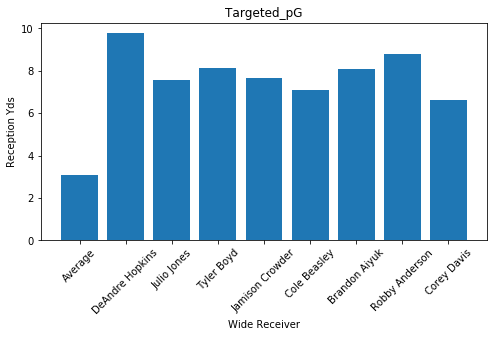

----------------------------------------
Defense

Avg Passing_Att_pG: 35.22
Philadelphia Eagles Passing_Att_pG: 33.15
--------------------------------------------------
Avg Passing_Att_pG: 35.22
Tampa Bay Buccaneers Passing_Att_pG: 37.92
--------------------------------------------------
Avg Passing_Att_pG: 35.22
Pittsburgh Steelers Passing_Att_pG: 34.77
--------------------------------------------------
Avg Passing_Att_pG: 35.22
Los Angeles Rams Passing_Att_pG: 35.23
--------------------------------------------------
Avg Passing_Att_pG: 35.22
Denver Broncos Passing_Att_pG: 35.08
--------------------------------------------------
Avg Passing_Att_pG: 35.22
Dallas Cowboys Passing_Att_pG: 31.23
--------------------------------------------------
Avg Passing_Att_pG: 35.22
Green Bay Packers Passing_Att_pG: 33.31
--------------------------------------------------
Avg Passing_Att_pG: 35.22
Detroit Lions Passing_Att_pG: 34.46
--------------------------------------------------


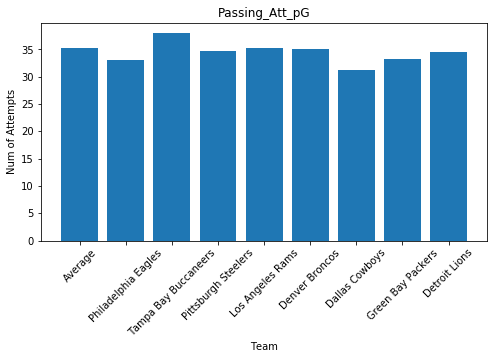

In [85]:
print('Wide Receivers')
print('')
average, wr_1, _1wr = print_metric(available_wrs, 'Targeted_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'Targeted_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'Targeted_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'Targeted_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'Targeted_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'Targeted_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'Targeted_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'Targeted_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'Targeted_pG', 'Wide Receiver', 'Reception Yds')

print('-'*40)
print('Defense')
print('')

average, wr_team1, wr_def1 = print_metric_team(defense, 'Passing_Att_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Passing_Att_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Passing_Att_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Passing_Att_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Passing_Att_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Passing_Att_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Passing_Att_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Passing_Att_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Passing_Att_pG', 'Team', 'Num of Attempts')

Wide Receivers

Avg Receptions_pG: 2.0
DeAndre Hopkins Receptions_pG: 7.23
--------------------------------------------------
Avg Receptions_pG: 2.0
Julio Jones Receptions_pG: 5.67
--------------------------------------------------
Avg Receptions_pG: 2.0
Tyler Boyd Receptions_pG: 6.0
--------------------------------------------------
Avg Receptions_pG: 2.0
Jamison Crowder Receptions_pG: 4.67
--------------------------------------------------
Avg Receptions_pG: 2.0
Cole Beasley Receptions_pG: 5.46
--------------------------------------------------
Avg Receptions_pG: 2.0
Brandon Aiyuk Receptions_pG: 5.0
--------------------------------------------------
Avg Receptions_pG: 2.0
Robby Anderson Receptions_pG: 6.38
--------------------------------------------------
Avg Receptions_pG: 2.0
Corey Davis Receptions_pG: 5.09
--------------------------------------------------


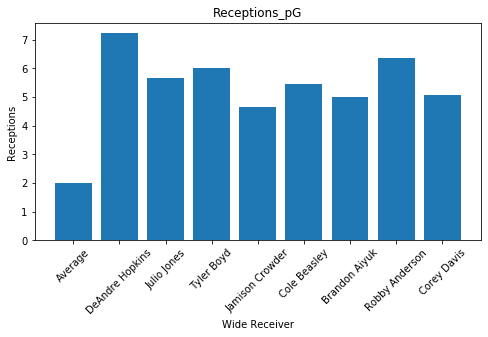

----------------------------------------
Defense

Avg Completions_pG: 23.04
Philadelphia Eagles Completions_pG: 22.46
--------------------------------------------------
Avg Completions_pG: 23.04
Tampa Bay Buccaneers Completions_pG: 26.31
--------------------------------------------------
Avg Completions_pG: 23.04
Pittsburgh Steelers Completions_pG: 19.46
--------------------------------------------------
Avg Completions_pG: 23.04
Los Angeles Rams Completions_pG: 22.0
--------------------------------------------------
Avg Completions_pG: 23.04
Denver Broncos Completions_pG: 23.15
--------------------------------------------------
Avg Completions_pG: 23.04
Dallas Cowboys Completions_pG: 20.31
--------------------------------------------------
Avg Completions_pG: 23.04
Green Bay Packers Completions_pG: 21.62
--------------------------------------------------
Avg Completions_pG: 23.04
Detroit Lions Completions_pG: 23.31
--------------------------------------------------


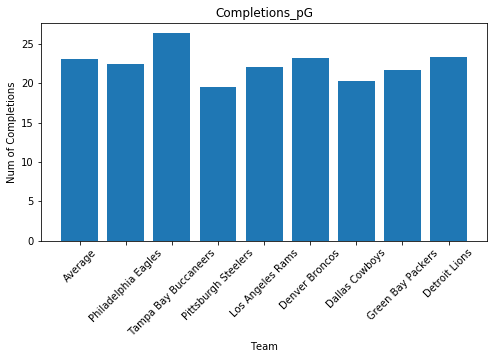

In [86]:
print('Wide Receivers')
print('')
average, wr_1, _1wr = print_metric(available_wrs, 'Receptions_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'Receptions_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'Receptions_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'Receptions_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'Receptions_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'Receptions_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'Receptions_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'Receptions_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'Receptions_pG', 'Wide Receiver', 'Receptions')

print('-'*40)
print('Defense')
print('')

average, wr_team1, wr_def1 = print_metric_team(defense, 'Completions_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Completions_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Completions_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Completions_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Completions_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Completions_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Completions_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Completions_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Completions_pG', 'Team', 'Num of Completions')

Wide Receivers

Avg Catch_Rate: 0.66
DeAndre Hopkins Catch_Rate: 0.74
--------------------------------------------------
Avg Catch_Rate: 0.66
Julio Jones Catch_Rate: 0.75
--------------------------------------------------
Avg Catch_Rate: 0.66
Tyler Boyd Catch_Rate: 0.74
--------------------------------------------------
Avg Catch_Rate: 0.66
Jamison Crowder Catch_Rate: 0.61
--------------------------------------------------
Avg Catch_Rate: 0.66
Cole Beasley Catch_Rate: 0.77
--------------------------------------------------
Avg Catch_Rate: 0.66
Brandon Aiyuk Catch_Rate: 0.62
--------------------------------------------------
Avg Catch_Rate: 0.66
Robby Anderson Catch_Rate: 0.73
--------------------------------------------------
Avg Catch_Rate: 0.66
Corey Davis Catch_Rate: 0.77
--------------------------------------------------


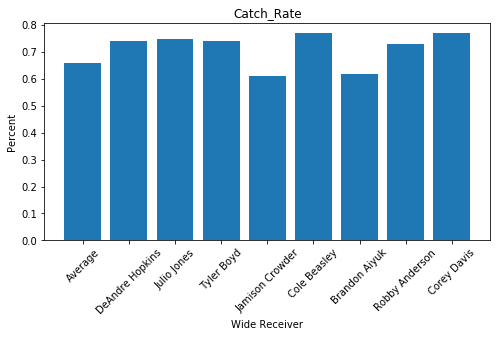

----------------------------------------
Defense

Avg Completion_Percent_Allowed: 0.65
Philadelphia Eagles Completion_Percent_Allowed: 0.68
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
Tampa Bay Buccaneers Completion_Percent_Allowed: 0.69
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
Pittsburgh Steelers Completion_Percent_Allowed: 0.56
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
Los Angeles Rams Completion_Percent_Allowed: 0.62
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
Denver Broncos Completion_Percent_Allowed: 0.66
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
Dallas Cowboys Completion_Percent_Allowed: 0.65
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
Green Bay Packers Completion_Percent_Allowed: 0.65
----------------------------

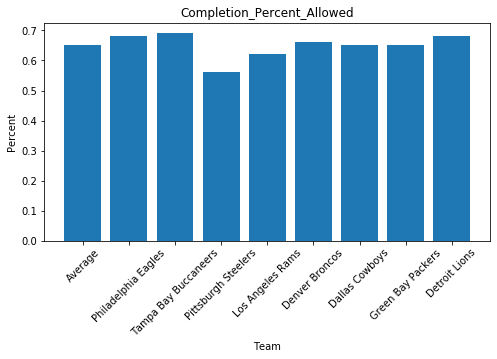

In [87]:
print('Wide Receivers')
print('')
average, wr_1, _1wr = print_metric(available_wrs, 'Catch_Rate', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'Catch_Rate', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'Catch_Rate', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'Catch_Rate', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'Catch_Rate', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'Catch_Rate', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'Catch_Rate', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'Catch_Rate', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'Catch_Rate', 'Wide Receiver', 'Percent')

print('-'*40)
print('Defense')
print('')

average, wr_team1, wr_def1 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Completion_Percent_Allowed', 'Team', 'Percent')

Wide Receivers

Avg ReceivingYds_pG: 24.77
DeAndre Hopkins ReceivingYds_pG: 88.85
--------------------------------------------------
Avg ReceivingYds_pG: 24.77
Julio Jones ReceivingYds_pG: 85.67
--------------------------------------------------
Avg ReceivingYds_pG: 24.77
Tyler Boyd ReceivingYds_pG: 64.62
--------------------------------------------------
Avg ReceivingYds_pG: 24.77
Jamison Crowder ReceivingYds_pG: 56.67
--------------------------------------------------
Avg ReceivingYds_pG: 24.77
Cole Beasley ReceivingYds_pG: 64.46
--------------------------------------------------
Avg ReceivingYds_pG: 24.77
Brandon Aiyuk ReceivingYds_pG: 66.0
--------------------------------------------------
Avg ReceivingYds_pG: 24.77
Robby Anderson ReceivingYds_pG: 76.62
--------------------------------------------------
Avg ReceivingYds_pG: 24.77
Corey Davis ReceivingYds_pG: 75.91
--------------------------------------------------


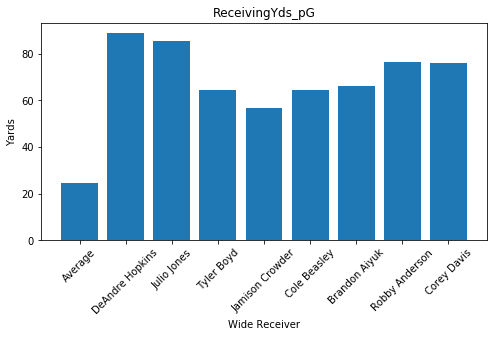

----------------------------------------
Defense

Avg Passing_Yds_pG: 239.3
Philadelphia Eagles Passing_Yds_pG: 220.62
--------------------------------------------------
Avg Passing_Yds_pG: 239.3
Tampa Bay Buccaneers Passing_Yds_pG: 249.38
--------------------------------------------------
Avg Passing_Yds_pG: 239.3
Pittsburgh Steelers Passing_Yds_pG: 202.15
--------------------------------------------------
Avg Passing_Yds_pG: 239.3
Los Angeles Rams Passing_Yds_pG: 191.69
--------------------------------------------------
Avg Passing_Yds_pG: 239.3
Denver Broncos Passing_Yds_pG: 220.69
--------------------------------------------------
Avg Passing_Yds_pG: 239.3
Dallas Cowboys Passing_Yds_pG: 215.15
--------------------------------------------------
Avg Passing_Yds_pG: 239.3
Green Bay Packers Passing_Yds_pG: 226.0
--------------------------------------------------
Avg Passing_Yds_pG: 239.3
Detroit Lions Passing_Yds_pG: 263.85
--------------------------------------------------


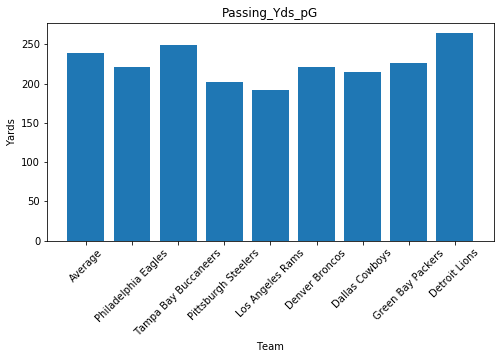

In [88]:
print('Wide Receivers')
print('')
average, wr_1, _1wr = print_metric(available_wrs, 'ReceivingYds_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'ReceivingYds_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'ReceivingYds_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'ReceivingYds_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'ReceivingYds_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'ReceivingYds_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'ReceivingYds_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'ReceivingYds_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'ReceivingYds_pG', 'Wide Receiver', 'Yards')

print('-'*40)
print('Defense')
print('')

average, wr_team1, wr_def1 = print_metric_team(defense, 'Passing_Yds_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Passing_Yds_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Passing_Yds_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Passing_Yds_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Passing_Yds_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Passing_Yds_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Passing_Yds_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Passing_Yds_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Passing_Yds_pG', 'Team', 'Yards')

Wide Receivers

Avg ReceivingTDs_pG: 0.13
DeAndre Hopkins ReceivingTDs_pG: 0.38
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Julio Jones ReceivingTDs_pG: 0.33
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Tyler Boyd ReceivingTDs_pG: 0.31
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Jamison Crowder ReceivingTDs_pG: 0.56
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Cole Beasley ReceivingTDs_pG: 0.31
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Brandon Aiyuk ReceivingTDs_pG: 0.4
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Robby Anderson ReceivingTDs_pG: 0.15
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Corey Davis ReceivingTDs_pG: 0.36
--------------------------------------------------


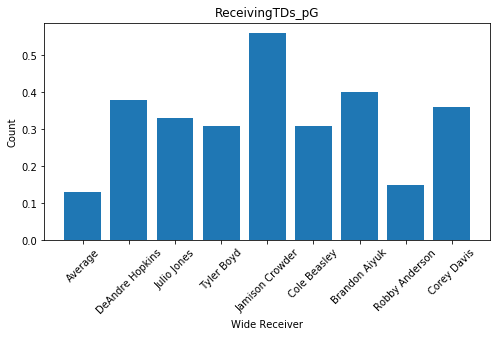

----------------------------------------
Defense

Avg Passing_TDs_pG: 1.69
Philadelphia Eagles Passing_TDs_pG: 1.46
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Tampa Bay Buccaneers Passing_TDs_pG: 1.85
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Pittsburgh Steelers Passing_TDs_pG: 1.46
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Los Angeles Rams Passing_TDs_pG: 1.08
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Denver Broncos Passing_TDs_pG: 1.23
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Dallas Cowboys Passing_TDs_pG: 2.15
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Green Bay Packers Passing_TDs_pG: 1.69
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Detroit Lions Passing_TDs_pG: 2.0
--------------------------------------------------


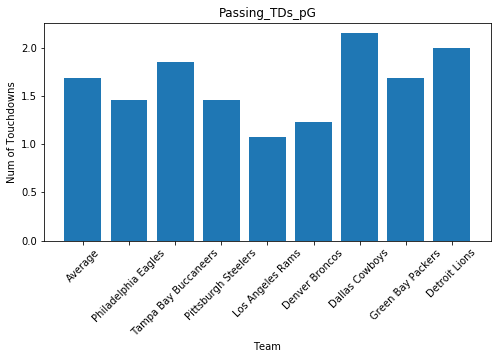

In [89]:
print('Wide Receivers')
print('')
average, wr_1, _1wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'ReceivingTDs_pG', 'Wide Receiver', 'Count')

print('-'*40)
print('Defense')
print('')

average, wr_team1, wr_def1 = print_metric_team(defense, 'Passing_TDs_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Passing_TDs_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Passing_TDs_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Passing_TDs_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Passing_TDs_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Passing_TDs_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Passing_TDs_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Passing_TDs_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Passing_TDs_pG', 'Team', 'Num of Touchdowns')

#### Additional Defense Stats

Avg Ttl_Pts_Allowed_pG: 24.67
Philadelphia Eagles Ttl_Pts_Allowed_pG: 25.23
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.67
Tampa Bay Buccaneers Ttl_Pts_Allowed_pG: 22.62
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.67
Pittsburgh Steelers Ttl_Pts_Allowed_pG: 18.23
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.67
Los Angeles Rams Ttl_Pts_Allowed_pG: 18.92
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.67
Denver Broncos Ttl_Pts_Allowed_pG: 26.69
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.67
Dallas Cowboys Ttl_Pts_Allowed_pG: 30.77
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.67
Green Bay Packers Ttl_Pts_Allowed_pG: 24.85
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.67
Detroit Lions Ttl_Pts_Allowed_pG: 29.92
--------------------------------------------------


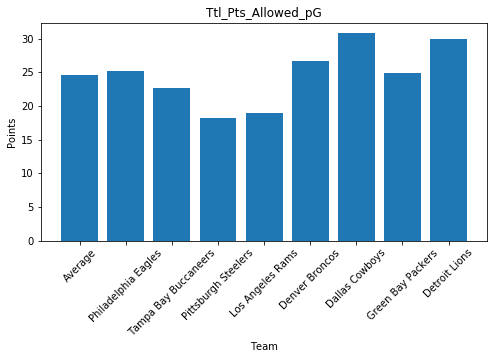

In [90]:
average, wr_team1, wr_def1 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Ttl_Pts_Allowed_pG', 'Team', 'Points')




## Defense

In [91]:
ttl_offense = offense[['Team', 'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs', 'Interceptions', 
              'RushingAttempts', 'RushingYds', 'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 
              'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'FDFantasyPts']]

ttl_offense = ttl_offense.groupby('Team').sum()

In [92]:
ttl_offense.head()

,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts
Team,,,,,,,,,,,,,,,,
2TM,0,0,0,0,0,227,801,7,90,67,470,2,4,1,9,216.00
ARI,309,461,3231,23,10,404,1966,20,434,308,3228,22,16,5,42,1126.60
ATL,318,500,3699,20,11,346,1276,12,482,318,3699,20,7,3,32,1064.30
BAL,209,334,2350,19,9,423,2259,19,321,209,2353,19,14,6,39,954.70
BUF,328,478,3695,30,9,331,1333,10,458,328,3695,30,14,10,40,1145.60


In [93]:
ttl_offense.reset_index(inplace=True)

In [94]:
team_names = pd.read_pickle('long_names')
ttl_offense = pd.merge(ttl_offense, team_names, on = 'Team')

In [95]:
num_games = defense[['Team', 'GP']]
num_games.head(3)

,Team,GP
0,Pittsburgh Steelers,13
1,Miami Dolphins,13
2,Los Angeles Rams,13


In [96]:
ttl_offense = pd.merge(ttl_offense, num_games, left_on = 'Long_Name', right_on = 'Team')
ttl_offense.drop(columns=['Team_y'], inplace = True)
ttl_offense.rename(columns = {'Team_x': 'Team'}, inplace = True)
ttl_offense = ttl_offense[['Team', 'Long_Name', 'GP', 'CompletedPasses', 'PassesAttempted', 'PassingYds', 
                           'PassingTDs', 'Interceptions', 'RushingAttempts', 'RushingYds', 'RushingTDs', 'Targeted', 
                           'Receptions', 'ReceivingYds', 'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 
                           'FDFantasyPts']]

ttl_offense['Ttl_Turnovers'] = ttl_offense['Interceptions'] + ttl_offense['LostFumbles']
ttl_offense.head()

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,Ttl_Turnovers
0,ARI,Arizona Cardinals,13,309,461,3231,23,10,404,1966,20,434,308,3228,22,16,5,42,1126.60,15
1,ATL,Atlanta Falcons,13,318,500,3699,20,11,346,1276,12,482,318,3699,20,7,3,32,1064.30,14
2,BAL,Baltimore Ravens,13,209,334,2350,19,9,423,2259,19,321,209,2353,19,14,6,39,954.70,15
3,BUF,Buffalo Bills,13,328,478,3695,30,9,331,1333,10,458,328,3695,30,14,10,40,1145.60,19
4,CAR,Carolina Panthers,13,314,449,3375,15,10,321,1371,16,429,315,3403,15,7,3,31,1003.90,13


In [97]:
per_week_stats(ttl_offense, 'CompletedPasses', 'GP')
per_week_stats(ttl_offense, 'PassesAttempted', 'GP')
ttl_offense['Completion_Percent'] = ttl_offense['CompletedPasses_pG']/ttl_offense['PassesAttempted_pG']
per_week_stats(ttl_offense, 'PassingYds', 'GP')
ttl_offense['PassYds_pAtt'] = ttl_offense['PassingYds_pG']/ttl_offense['PassesAttempted_pG']
per_week_stats(ttl_offense, 'RushingAttempts', 'GP')
per_week_stats(ttl_offense, 'RushingYds', 'GP')
ttl_offense['RushYds_pAtt'] = ttl_offense['RushingYds_pG']/ttl_offense['RushingAttempts_pG']
ttl_offense['Ttl_Yds'] = ttl_offense['PassingYds_pG'] + ttl_offense['RushingYds_pG']
per_week_stats(ttl_offense, 'Ttl_Turnovers', 'GP')
per_week_stats(ttl_offense, 'TtlTDs', 'GP')

In [106]:
taken_def = ['Baltimore Ravens', 'Indianapolis Colts', 'Kansas City Chiefs',  'Los Angeles Rams', 'Miami Dolphins', 
             'Minnesota Vikings', 'New England Patriots', 'New Orleans Saints', 'Pittsburgh Steelers',
             'San Francisco 49ers', 'Seattle Seahawks']


In [107]:
taken_off = ['Cleveland Browns', 'Las Vegas Raiders', 'Miami Dolphins', 'New England Patriots', 'Kansas City Chiefs', 
             'Tampa Bay Buccaneers', 'Los Angeles Rams', 'Philadelphia Eagles', 'Buffalo Bills', 'Washington Football Team', 
             'New York Jets']


In [108]:
available_def = defense[~defense['Team'].isin(taken_def)]
available_def.head()

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
7,Washington Football Team,12,260,743,5.00,3731,311,1285,4.10,9,396,5.70,255,10.60,2446,18,34,16,47.10,14,11,3,36,82.00,15.00,4.00,1.00,4.00,2.00,4.00,17.00,0.00,5.00,0.00,12.00,15.00,3.00,21.67,310.92,25.92,107.08,0.75,33.00,21.25,0.64,203.83,1.50,2.25,1.17,0.25,3.00,6.83
8,New York Giants,12,265,758,5.40,4068,292,1160,4.00,10,434,6.20,291,10.90,2908,17,39,21,53.80,20,10,10,32,89.00,4.00,9.00,-2.00,5.00,11.00,14.00,5.00,4.00,13.00,4.00,0.00,9.00,13.00,22.08,339.00,24.33,96.67,0.83,36.17,24.25,0.67,242.33,1.42,2.25,1.67,0.83,2.67,7.42
10,Tampa Bay Buccaneers,12,280,761,5.20,3959,271,890,3.30,8,456,6.30,318,10.40,3069,23,38,24,63.20,20,14,6,34,88.00,0.00,14.00,16.00,6.00,6.00,19.00,6.00,7.00,1.00,5.00,4.00,4.00,0.00,23.33,329.92,22.58,74.17,0.67,38.00,26.50,0.70,255.75,1.92,2.58,1.67,0.50,2.83,7.33
11,Chicago Bears,12,284,792,5.40,4254,348,1393,4.00,9,421,6.40,262,11.40,2861,19,42,22,52.40,12,7,5,23,63.00,3.00,12.00,4.00,2.00,6.00,11.00,9.00,1.00,4.00,12.00,0.00,-4.00,3.00,23.67,354.50,29.00,116.08,0.75,35.08,21.83,0.62,238.42,1.58,2.33,1.00,0.42,1.92,5.25
13,Arizona Cardinals,12,296,801,5.40,4319,330,1476,4.50,11,442,6.00,293,10.40,2843,20,44,23,52.30,15,10,5,29,64.00,4.00,9.00,4.00,1.00,7.00,15.00,7.00,0.00,2.00,3.00,2.00,8.00,2.00,24.67,359.92,27.50,123.00,0.92,36.83,24.42,0.66,236.92,1.67,2.58,1.25,0.42,2.42,5.33


In [109]:
scaled_def = available_def[['Team', 'GP', 'Ttl_Pts_Allowed_pG', 'Ttl_Yds_pG', 'Rushing_Att_pG', 'Rushing_Yds_pG', 
                            'Completions', 'Completion_Percent_Allowed', 'Passing_Yds_pG', 'Passing_TDs', 'Sacks_pG',
                            'Ttl_Turnovers_pG']]

def_columns = ['Ttl_Pts_Allowed_pG', 'Ttl_Yds_pG', 'Rushing_Att_pG', 'Rushing_Yds_pG', 'Completions', 
               'Completion_Percent_Allowed', 'Passing_Yds_pG', 'Passing_TDs', 'Sacks_pG', 'Ttl_Turnovers_pG']

scale_data(scaled_def, def_columns)

In [116]:
scaled_def['Combined_Score'] = (scaled_def['Sacks_pG'] + scaled_def['Ttl_Turnovers_pG'] - 
                                scaled_def['Ttl_Pts_Allowed_pG'] - scaled_def['Ttl_Yds_pG'] -
                                scaled_def['Rushing_Att_pG'] - scaled_def['Rushing_Yds_pG'] - 
                                scaled_def['Completions'] - scaled_def['Completion_Percent_Allowed'] - 
                                scaled_def['Passing_Yds_pG'] - scaled_def['Passing_TDs'])

scaled_def.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_def.head(20)

,Team,GP,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Completions,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs,Sacks_pG,Ttl_Turnovers_pG,Combined_Score
7,Washington Football Team,12,-1.75,-2.07,-0.64,-0.73,-1.17,-0.75,-1.79,-1.11,1.47,-0.14,11.33
8,New York Giants,12,-1.60,-1.05,-1.26,-1.28,0.37,0.35,-0.19,-1.41,0.94,1.64,8.63
14,Green Bay Packers,12,-0.54,-1.04,-1.10,-0.33,-1.21,-0.65,-0.92,-0.19,0.81,-0.44,6.36
10,Tampa Bay Buccaneers,12,-1.13,-1.38,-1.95,-2.46,1.53,1.47,0.37,0.42,1.20,1.64,5.97
11,Chicago Bears,12,-1.01,-0.48,0.57,-0.26,-0.87,-1.65,-0.35,-0.80,-0.25,-0.73,3.85
20,Denver Broncos,12,0.11,-0.64,0.51,0.55,-0.48,-0.44,-1.17,-1.72,0.94,-1.03,3.19
18,Philadelphia Eagles,12,-0.29,-0.75,1.29,0.47,-0.78,0.40,-1.24,-1.41,1.73,-1.03,3.01
21,Cleveland Browns,12,0.14,-0.24,-0.84,-0.87,0.63,-0.38,0.42,1.03,0.67,1.64,2.42
17,Buffalo Bills,12,-0.32,0.28,-0.18,0.26,0.03,0.23,0.11,-0.80,0.67,1.34,2.41
26,Los Angeles Chargers,12,0.89,-1.06,-0.31,0.17,-1.34,-1.30,-1.35,0.73,-0.52,-0.73,2.33


In [113]:
available_off = ttl_offense[~ttl_offense['Long_Name'].isin(taken_off)]
available_off.head()

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,Ttl_Turnovers,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassYds_pAtt,RushingAttempts_pG,RushingYds_pG,RushYds_pAtt,Ttl_Yds,Ttl_Turnovers_pG,TtlTDs_pG
0,ARI,Arizona Cardinals,12,285,426,2987,22,10,361,1807,19,403,284,2984,21,13,5,40,1048.60,15,23.75,35.50,0.67,248.92,7.01,30.08,150.58,5.01,399.50,1.25,3.33
1,ATL,Atlanta Falcons,12,296,467,3436,18,8,326,1206,12,450,296,3436,18,7,3,30,992.40,11,24.67,38.92,0.63,286.33,7.36,27.17,100.50,3.70,386.83,0.92,2.50
2,BAL,Baltimore Ravens,12,197,313,2174,18,9,391,2028,14,302,197,2177,18,13,6,33,859.00,15,16.42,26.08,0.63,181.17,6.95,32.58,169.00,5.19,350.17,1.25,2.75
4,CAR,Carolina Panthers,12,284,409,3092,15,10,300,1246,13,390,285,3120,15,7,3,28,918.80,13,23.67,34.08,0.69,257.67,7.56,25.00,103.83,4.15,361.50,1.08,2.33
5,CHI,Chicago Bears,12,306,482,2939,20,13,263,1032,5,464,305,2935,20,13,4,26,887.80,17,25.50,40.17,0.63,244.92,6.10,21.92,86.00,3.92,330.92,1.42,2.17


In [117]:
def_team1 = 7 # Washington Football Team
def_team2 = 8 # New York Giants
def_team3 = 14 # Green Bay Packers
def_team4 = 10 # Tampa Bay Buccaneers
def_team5 = 31 # Dallas Cowboys

Week 12 Opponents:
    

In [118]:
off_opp = ['SFO', 'ARI', 'DET', 'MIN', 'CIN']

In [119]:
ttl_offense[ttl_offense['Team'].isin(off_opp)]

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,Ttl_Turnovers,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassYds_pAtt,RushingAttempts_pG,RushingYds_pG,RushYds_pAtt,Ttl_Yds,Ttl_Turnovers_pG,TtlTDs_pG
0,ARI,Arizona Cardinals,12,285,426,2987,22,10,361,1807,19,403,284,2984,21,13,5,40,1048.60,15,23.75,35.50,0.67,248.92,7.01,30.08,150.58,5.01,399.50,1.25,3.33
6,CIN,Cincinnati Bengals,12,302,471,3063,15,9,286,1053,9,456,302,3063,15,16,10,24,860.10,19,25.17,39.25,0.64,255.25,6.50,23.83,87.75,3.68,343.00,1.58,2.00
10,DET,Detroit Lions,12,279,442,3372,22,10,287,1123,11,416,271,3296,21,6,3,32,982.30,13,23.25,36.83,0.63,281.00,7.63,23.92,93.58,3.91,374.58,1.08,2.67
20,MIN,Minnesota Vikings,12,246,363,3073,26,12,359,1748,14,344,246,3073,26,12,9,40,1064.00,21,20.50,30.25,0.68,256.08,8.47,29.92,145.67,4.87,401.75,1.75,3.33
28,SFO,San Francisco 49ers,12,282,423,3286,17,14,320,1318,16,412,281,3277,17,13,7,33,969.40,21,23.50,35.25,0.67,273.83,7.77,26.67,109.83,4.12,383.67,1.75,2.75


In [122]:
off_team1 = 28
off_team2 = 0
off_team3 = 10
off_team4 = 20
off_team5 = 6

#### Defense Comparisons

Defense

Avg Ttl_Yds_pG: 367.86
Washington Football Team Ttl_Yds_pG: 310.92
--------------------------------------------------
Avg Ttl_Yds_pG: 367.86
New York Giants Ttl_Yds_pG: 339.0
--------------------------------------------------
Avg Ttl_Yds_pG: 367.86
Green Bay Packers Ttl_Yds_pG: 339.25
--------------------------------------------------
Avg Ttl_Yds_pG: 367.86
Tampa Bay Buccaneers Ttl_Yds_pG: 329.92
--------------------------------------------------
Avg Ttl_Yds_pG: 367.86
Dallas Cowboys Ttl_Yds_pG: 383.58
--------------------------------------------------


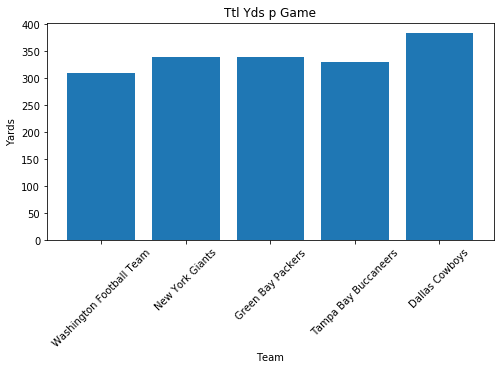

----------------------------------------
Offense

Avg Ttl_Yds: 373.54
SFO Ttl_Yds: 383.67
--------------------------------------------------
Avg Ttl_Yds: 373.54
ARI Ttl_Yds: 399.5
--------------------------------------------------
Avg Ttl_Yds: 373.54
DET Ttl_Yds: 374.58
--------------------------------------------------
Avg Ttl_Yds: 373.54
MIN Ttl_Yds: 401.75
--------------------------------------------------
Avg Ttl_Yds: 373.54
CIN Ttl_Yds: 343.0
--------------------------------------------------


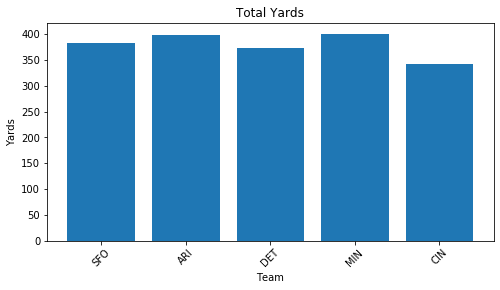

In [123]:
print('Defense')
print('')
average, def1, _1def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team1)
average, def2, _2def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team2)
average, def3, _3def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team3)
average, def4, _4def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team4)
average, def5, _5def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team5)

x = [def1, def2, def3, def4, def5]
y = [_1def, _2def, _3def, _4def, _5def]

bar_plot(x, y, "Ttl Yds p Game", "Team", "Yards")

print('-'*40)
print('Offense')
print('')

average, off1, _1off = print_metric_team(available_off, 'Ttl_Yds', off_team1)
average, off2, _2off = print_metric_team(available_off, 'Ttl_Yds', off_team2)
average, off3, _3off = print_metric_team(available_off, 'Ttl_Yds', off_team3)
average, off4, _4off = print_metric_team(available_off, 'Ttl_Yds', off_team4)
average, off5, _5off = print_metric_team(available_off, 'Ttl_Yds', off_team5)

x = [off1, off2, off3, off4, off5]
y = [_1off, _2off, _3off, _4off, _5off]

bar_plot(x, y, "Total Yards", "Team", "Yards")

Defense

Avg Ttl_Turnovers_pG: 1.21
Washington Football Team Ttl_Turnovers_pG: 1.17
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.21
New York Giants Ttl_Turnovers_pG: 1.67
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.21
Green Bay Packers Ttl_Turnovers_pG: 1.08
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.21
Tampa Bay Buccaneers Ttl_Turnovers_pG: 1.67
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.21
Dallas Cowboys Ttl_Turnovers_pG: 0.92
--------------------------------------------------


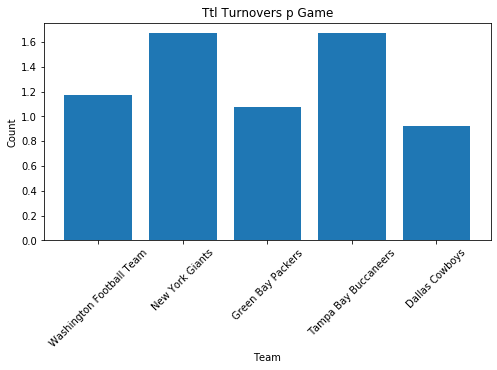

----------------------------------------
Offense

Avg Ttl_Turnovers_pG: 1.3
SFO Ttl_Turnovers_pG: 1.75
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.3
ARI Ttl_Turnovers_pG: 1.25
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.3
DET Ttl_Turnovers_pG: 1.08
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.3
MIN Ttl_Turnovers_pG: 1.75
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.3
CIN Ttl_Turnovers_pG: 1.58
--------------------------------------------------


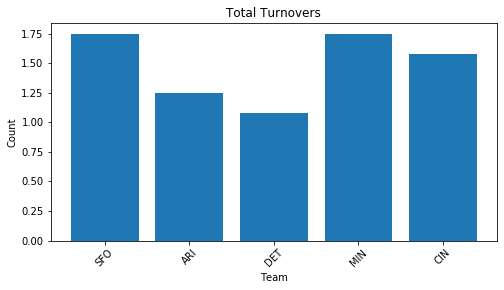

In [124]:
print('Defense')
print('')
average, def1, _1def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team1)
average, def2, _2def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team2)
average, def3, _3def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team3)
average, def4, _4def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team4)
average, def5, _5def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team5)

x = [def1, def2, def3, def4, def5]
y = [_1def, _2def, _3def, _4def, _5def]

bar_plot(x, y, "Ttl Turnovers p Game", "Team", "Count")

print('-'*40)
print('Offense')
print('')

average, off1, _1off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team1)
average, off2, _2off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team2)
average, off3, _3off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team3)
average, off4, _4off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team4)
average, off5, _5off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team5)

x = [off1, off2, off3, off4, off5]
y = [_1off, _2off, _3off, _4off, _5off]

bar_plot(x, y, "Total Turnovers", "Team", "Count")

Defense

Avg Ttl_TDs_pG: 2.9
Washington Football Team Ttl_TDs_pG: 2.25
--------------------------------------------------
Avg Ttl_TDs_pG: 2.9
New York Giants Ttl_TDs_pG: 2.25
--------------------------------------------------
Avg Ttl_TDs_pG: 2.9
Green Bay Packers Ttl_TDs_pG: 2.67
--------------------------------------------------
Avg Ttl_TDs_pG: 2.9
Tampa Bay Buccaneers Ttl_TDs_pG: 2.58
--------------------------------------------------
Avg Ttl_TDs_pG: 2.9
Dallas Cowboys Ttl_TDs_pG: 3.67
--------------------------------------------------


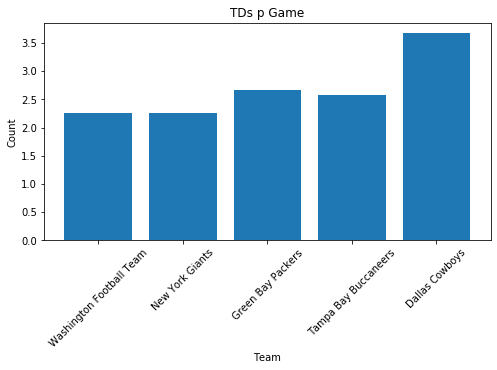

----------------------------------------
Offense

Avg TtlTDs_pG: 2.73
SFO TtlTDs_pG: 2.75
--------------------------------------------------
Avg TtlTDs_pG: 2.73
ARI TtlTDs_pG: 3.33
--------------------------------------------------
Avg TtlTDs_pG: 2.73
DET TtlTDs_pG: 2.67
--------------------------------------------------
Avg TtlTDs_pG: 2.73
MIN TtlTDs_pG: 3.33
--------------------------------------------------
Avg TtlTDs_pG: 2.73
CIN TtlTDs_pG: 2.0
--------------------------------------------------


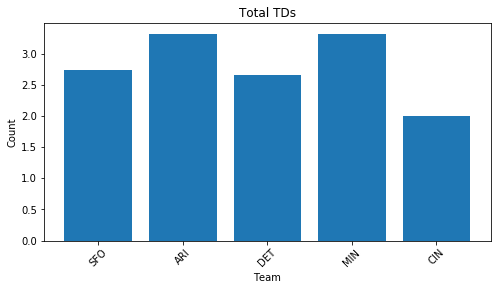

In [125]:
print('Defense')
print('')
average, def1, _1def = print_metric_team(available_def, 'Ttl_TDs_pG', def_team1)
average, def2, _2def = print_metric_team(available_def, 'Ttl_TDs_pG', def_team2)
average, def3, _3def = print_metric_team(available_def, 'Ttl_TDs_pG', def_team3)
average, def4, _4def = print_metric_team(available_def, 'Ttl_TDs_pG', def_team4)
average, def5, _5def = print_metric_team(available_def, 'Ttl_TDs_pG', def_team5)

x = [def1, def2, def3, def4, def5]
y = [_1def, _2def, _3def, _4def, _5def]

bar_plot(x, y, "TDs p Game", "Team", "Count")

print('-'*40)
print('Offense')
print('')

average, off1, _1off = print_metric_team(available_off, 'TtlTDs_pG', off_team1)
average, off2, _2off = print_metric_team(available_off, 'TtlTDs_pG', off_team2)
average, off3, _3off = print_metric_team(available_off, 'TtlTDs_pG', off_team3)
average, off4, _4off = print_metric_team(available_off, 'TtlTDs_pG', off_team4)
average, off5, _5off = print_metric_team(available_off, 'TtlTDs_pG', off_team5)

x = [off1, off2, off3, off4, off5]
y = [_1off, _2off, _3off, _4off, _5off]

bar_plot(x, y, "Total TDs", "Team", "Count")

#### Additional Defense Stats

Avg Sacks_pG: 2.08
Washington Football Team Sacks_pG: 3.0
--------------------------------------------------
Avg Sacks_pG: 2.08
New York Giants Sacks_pG: 2.67
--------------------------------------------------
Avg Sacks_pG: 2.08
Green Bay Packers Sacks_pG: 2.58
--------------------------------------------------
Avg Sacks_pG: 2.08
Tampa Bay Buccaneers Sacks_pG: 2.83
--------------------------------------------------
Avg Sacks_pG: 2.08
Dallas Cowboys Sacks_pG: 1.83
--------------------------------------------------


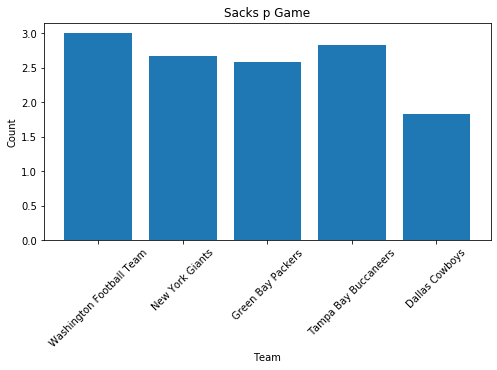

In [126]:
average, def1, _1def = print_metric_team(available_def, 'Sacks_pG', def_team1)
average, def2, _2def = print_metric_team(available_def, 'Sacks_pG', def_team2)
average, def3, _3def = print_metric_team(available_def, 'Sacks_pG', def_team3)
average, def4, _4def = print_metric_team(available_def, 'Sacks_pG', def_team4)
average, def5, _5def = print_metric_team(available_def, 'Sacks_pG', def_team5)

x = [def1, def2, def3, def4, def5]
y = [_1def, _2def, _3def, _4def, _5def]

bar_plot(x, y, "Sacks p Game", "Team", "Count")



## Kicking

In [129]:
available_kickers = kicking_df[~kicking_df['PLAYER'].isin(taken_k)]
available_kickers.head()

,PLAYER,POSITION,TEAM,GP,FGM_A,FG%,LNG,_1_19,_20_29,_30_39,_40_49,OVER50,XPM_A,XP%,PTS,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13
1,Jason Sanders,K,MIA,12,29,96.60,56,1-1,7-7,3-3,9-10,8-8,27,100.00,111,136.00,4.00,11.00,7.00,18.00,22.00,6.00,0.00,4.00,14.00,14.00,10.00,12.00,14.00
2,Daniel Carlson,K,LV,12,26,92.30,54,0-0,11-11,6-6,3-5,4-4,36,97.20,107,118.00,12.00,12.00,8.00,13.00,11.00,0.00,9.00,10.00,7.00,15.00,7.00,6.00,8.00
3,Tyler Bass,K,BUF,12,29,79.30,58,1-1,5-5,5-8,8-9,4-6,37,97.30,105,121.00,9.00,7.00,5.00,6.00,5.00,6.00,23.00,6.00,15.00,18.00,0.00,11.00,10.00
6,Ryan Succop,K,TB,12,24,91.70,50,0-0,7-7,8-8,6-7,1-2,38,94.70,102,110.00,5.00,7.00,9.00,8.00,14.00,10.00,9.00,15.00,4.00,17.00,6.00,6.00,0.00
10,Graham Gano,K,NYG,12,27,96.30,55,0-0,4-4,10-10,8-8,4-5,18,94.40,95,111.00,4.00,7.00,13.00,9.00,20.00,8.00,3.00,5.00,13.00,10.00,0.00,15.00,4.00


In [130]:
available_kickers.rename(columns={'PLAYER': 'Player'}, inplace=True)

In [131]:
available_kickers['FG_1_19'] = available_kickers['_1_19'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_20_29'] = available_kickers['_20_29'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_30_39'] = available_kickers['_30_39'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_40_49'] = available_kickers['_40_49'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_OVER50'] = available_kickers['OVER50'].map(lambda x: int(x.split('-')[0]))

In [132]:
available_kickers.sort_values('OVER50', ascending = False).head()

,Player,POSITION,TEAM,GP,FGM_A,FG%,LNG,_1_19,_20_29,_30_39,_40_49,OVER50,XPM_A,XP%,PTS,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,FG_1_19,FG_20_29,FG_30_39,FG_40_49,FG_OVER50
1,Jason Sanders,K,MIA,12,29,96.60,56,1-1,7-7,3-3,9-10,8-8,27,100.00,111,136.00,4.00,11.00,7.00,18.00,22.00,6.00,0.00,4.00,14.00,14.00,10.00,12.00,14.00,1,7,3,9,8
19,Brandon McManus,K,DEN,12,24,91.70,58,0-0,4-4,2-2,8-8,8-10,20,95.00,85,109.00,2.00,8.00,6.00,18.00,0.00,24.00,5.00,7.00,11.00,8.00,9.00,5.00,6.00,0,4,2,8,8
22,Stephen Gostkowski,K,TEN,12,24,66.70,55,0-0,2-3,3-4,5-10,6-7,37,94.60,83,100.00,4.00,12.00,25.00,0.00,6.00,4.00,8.00,2.00,7.00,7.00,12.00,10.00,3.00,0,2,3,5,6
21,Matt Prater,K,DET,12,25,72.00,59,0-0,4-4,6-6,4-7,4-8,31,96.80,84,96.00,12.00,3.00,14.00,3.00,0.00,11.00,16.00,3.00,9.00,16.00,0.00,5.00,4.00,0,4,6,4,4
3,Tyler Bass,K,BUF,12,29,79.30,58,1-1,5-5,5-8,8-9,4-6,37,97.30,105,121.00,9.00,7.00,5.00,6.00,5.00,6.00,23.00,6.00,15.00,18.00,0.00,11.00,10.00,1,5,5,8,4


In [133]:
scaled_k = available_kickers[['Player', 'POSITION', 'TEAM', 'GP', 'FGM_A', 'FG%', 'LNG', 'XPM_A', 'XP%', 'PTS',
                              'FG_1_19', 'FG_20_29', 'FG_30_39', 'FG_40_49', 'FG_OVER50']]

k_columns = ['FGM_A', 'FG%', 'LNG', 'XPM_A', 'XP%', 'PTS', 'FG_1_19', 'FG_20_29', 'FG_30_39', 'FG_40_49', 'FG_OVER50']

scale_data(scaled_k, k_columns)

scaled_k.head()

,Player,POSITION,TEAM,GP,FGM_A,FG%,LNG,XPM_A,XP%,PTS,FG_1_19,FG_20_29,FG_30_39,FG_40_49,FG_OVER50
1,Jason Sanders,K,MIA,12,1.44,0.78,0.53,0.38,0.81,1.40,3.11,1.66,-0.34,1.41,2.79
2,Daniel Carlson,K,LV,12,1.12,0.59,0.40,1.03,0.58,1.29,-0.32,3.29,0.86,-0.42,0.89
3,Tyler Bass,K,BUF,12,1.44,0.04,0.66,1.10,0.59,1.24,3.11,0.84,0.46,1.11,0.89
6,Ryan Succop,K,TB,12,0.90,0.57,0.14,1.18,0.37,1.15,-0.32,1.66,1.65,0.50,-0.53
10,Graham Gano,K,NYG,12,1.23,0.76,0.47,-0.27,0.35,0.96,-0.32,0.43,2.45,1.11,0.89


In [135]:
scaled_k['Combined_Score'] = (scaled_k['FGM_A'] + scaled_k['FG%'] + scaled_k['LNG'] + 
                              scaled_k['XPM_A'] + scaled_k['XP%'] + scaled_k['PTS'] + 
                              scaled_k['FG_1_19'] + scaled_k['FG_20_29'] + scaled_k['FG_30_39'] + 
                              scaled_k['FG_40_49'] + scaled_k['FG_OVER50'])

scaled_k.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_k.head()

,Player,POSITION,TEAM,GP,FGM_A,FG%,LNG,XPM_A,XP%,PTS,FG_1_19,FG_20_29,FG_30_39,FG_40_49,FG_OVER50,Combined_Score
1,Jason Sanders,K,MIA,12,1.44,0.78,0.53,0.38,0.81,1.40,3.11,1.66,-0.34,1.41,2.79,13.98
3,Tyler Bass,K,BUF,12,1.44,0.04,0.66,1.10,0.59,1.24,3.11,0.84,0.46,1.11,0.89,11.48
2,Daniel Carlson,K,LV,12,1.12,0.59,0.40,1.03,0.58,1.29,-0.32,3.29,0.86,-0.42,0.89,9.31
10,Graham Gano,K,NYG,12,1.23,0.76,0.47,-0.27,0.35,0.96,-0.32,0.43,2.45,1.11,0.89,8.05
6,Ryan Succop,K,TB,12,0.90,0.57,0.14,1.18,0.37,1.15,-0.32,1.66,1.65,0.50,-0.53,7.26


In [141]:
kicker1 = 1
kicker2 = 3
kicker3 = 2
kicker4 = 10
kicker5 = 6

Week 13 Opponents:

    Miami Dolphins vs Kansas City Chiefs
    Buffalo Bills vs Pittsburgh Steelers
    Las Vegas Raiders vs Indianapolis Colts
    New York Giants vs Arizona Cardinals
    Tampa Bay Buccaneers vs Minnesota Vikings

In [136]:
kicking_opponents = ['Kansas City Chiefs', 'Pittsburgh Steelers', 'Indianapolis Colts', 'Arizona Cardinals', 
                     'Minnesota Vikings']


In [137]:
kicking_defense = defense[defense['Team'].isin(kicking_opponents)]
kicking_defense['Ttl_TDs'] = kicking_defense['Rushing_TDs']+kicking_defense['Passing_TDs']
kicking_defense['Points_from_Kicking'] = kicking_defense['Ttl_Pts_Allowed']-(kicking_defense['Ttl_TDs']*7)
kicking_defense['Num_Field_Goals_Allowed'] = kicking_defense['Points_from_Kicking']/3
kicking_defense

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG,Ttl_TDs,Points_from_Kicking,Num_Field_Goals_Allowed
0,Pittsburgh Steelers,12,211,740,4.90,3606,287,1208,4.20,7,409,5.30,229,11.80,2398,17,30,17,56.70,23,16,7,44,127.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00,18.00,7.00,12.00,17.00,14.00,3.00,17.58,300.50,23.92,100.67,0.58,34.08,19.08,0.56,199.83,1.42,2.00,1.92,0.58,3.67,10.58,24,43,14.33
5,Kansas City Chiefs,12,254,762,5.60,4298,334,1589,4.80,10,408,6.30,257,11.00,2709,19,33,25,75.80,19,14,5,20,84.00,7.00,5.00,7.00,20.00,-1.00,3.00,18.00,7.00,1.00,0.00,1.00,5.00,5.00,21.17,358.17,27.83,132.42,0.83,34.00,21.42,0.63,225.75,1.58,2.42,1.58,0.42,1.67,7.00,29,51,17.00
9,Indianapolis Colts,12,273,728,5.30,3828,316,1211,3.80,14,384,6.40,244,11.50,2617,15,38,25,65.80,19,13,6,28,115.00,4.00,15.00,26.00,7.00,5.00,4.00,0.00,15.00,5.00,10.00,8.00,-3.00,12.00,22.75,319.00,26.33,100.92,1.17,32.00,20.33,0.64,218.08,1.25,2.42,1.58,0.50,2.33,9.58,29,70,23.33
13,Arizona Cardinals,12,296,801,5.40,4319,330,1476,4.50,11,442,6.00,293,10.40,2843,20,44,23,52.30,15,10,5,29,64.00,4.00,9.00,4.00,1.00,7.00,15.00,7.00,0.00,2.00,3.00,2.00,8.00,2.00,24.67,359.92,27.50,123.00,0.92,36.83,24.42,0.66,236.92,1.67,2.58,1.25,0.42,2.42,5.33,31,79,26.33
25,Minnesota Vikings,12,329,796,5.80,4592,337,1452,4.30,7,438,6.80,287,11.30,3140,24,41,21,51.20,17,11,6,21,57.00,-4.00,3.00,2.00,5.00,6.00,0.00,0.00,3.00,9.00,10.00,4.00,5.00,13.00,27.42,382.67,28.08,121.00,0.58,36.50,23.92,0.66,261.67,2.00,2.58,1.42,0.50,1.75,4.75,31,112,37.33


In [140]:
kick_def1 = 5
kick_def2 = 0
kick_def3 = 9
kick_def4 = 13
kick_def5 = 25

#### Kicking Comparison

Kickers

Avg FGM_A: 15.78
Jason Sanders FGM_A: 29
--------------------------------------------------
Avg FGM_A: 15.78
Tyler Bass FGM_A: 29
--------------------------------------------------
Avg FGM_A: 15.78
Daniel Carlson FGM_A: 26
--------------------------------------------------
Avg FGM_A: 15.78
Graham Gano FGM_A: 27
--------------------------------------------------
Avg FGM_A: 15.78
Ryan Succop FGM_A: 24
--------------------------------------------------


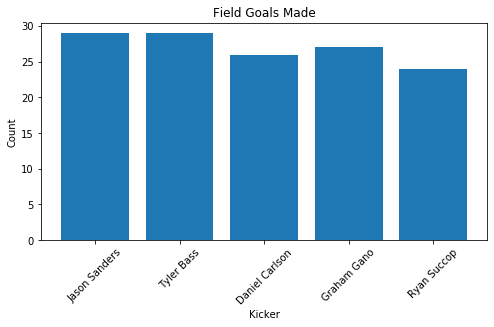

----------------------------------------
Defense

Avg Num_Field_Goals_Allowed: 23.67
Kansas City Chiefs Num_Field_Goals_Allowed: 17.0
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 23.67
Pittsburgh Steelers Num_Field_Goals_Allowed: 14.33
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 23.67
Indianapolis Colts Num_Field_Goals_Allowed: 23.33
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 23.67
Arizona Cardinals Num_Field_Goals_Allowed: 26.33
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 23.67
Minnesota Vikings Num_Field_Goals_Allowed: 37.33
--------------------------------------------------


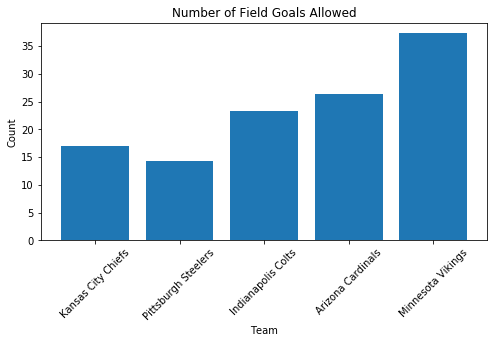

In [142]:
print('Kickers')
print('')
average, kick1, _1kick = print_metric(available_kickers, 'FGM_A', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'FGM_A', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'FGM_A', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'FGM_A', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'FGM_A', kicker5)

x = [kick1, kick2, kick3, kick4, kick5]
y = [_1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Field Goals Made', 'Kicker', 'Count')

print('-'*40)
print('Defense')
print('')

average, kdef1, _1kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def1)
average, kdef2, _2kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def2)
average, kdef3, _3kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def3)
average, kdef4, _4kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def4)
average, kdef5, _5kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def5)

x = [kdef1, kdef2, kdef3, kdef4, kdef5]
y = [_1kdef, _2kdef, _3kdef, _4kdef, _5kdef]

bar_plot(x, y, 'Number of Field Goals Allowed', 'Team', 'Count')

Kickers

Avg XPM_A: 21.75
Jason Sanders XPM_A: 27
--------------------------------------------------
Avg XPM_A: 21.75
Tyler Bass XPM_A: 37
--------------------------------------------------
Avg XPM_A: 21.75
Daniel Carlson XPM_A: 36
--------------------------------------------------
Avg XPM_A: 21.75
Graham Gano XPM_A: 18
--------------------------------------------------
Avg XPM_A: 21.75
Ryan Succop XPM_A: 38
--------------------------------------------------


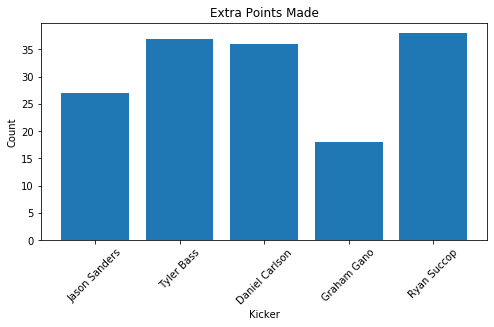

----------------------------------------
Defense

Avg Ttl_TDs: 28.8
Kansas City Chiefs Ttl_TDs: 29
--------------------------------------------------
Avg Ttl_TDs: 28.8
Pittsburgh Steelers Ttl_TDs: 24
--------------------------------------------------
Avg Ttl_TDs: 28.8
Indianapolis Colts Ttl_TDs: 29
--------------------------------------------------
Avg Ttl_TDs: 28.8
Arizona Cardinals Ttl_TDs: 31
--------------------------------------------------
Avg Ttl_TDs: 28.8
Minnesota Vikings Ttl_TDs: 31
--------------------------------------------------


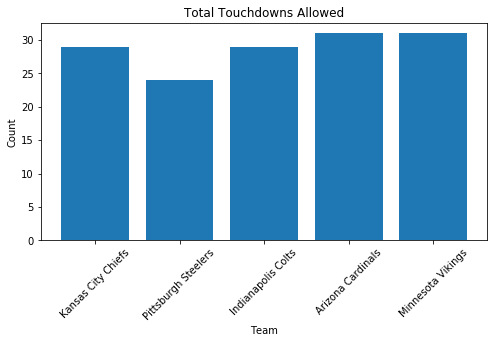

In [144]:
print('Kickers')
print('')
average, kick1, _1kick = print_metric(available_kickers, 'XPM_A', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'XPM_A', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'XPM_A', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'XPM_A', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'XPM_A', kicker5)

x = [kick1, kick2, kick3, kick4, kick5]
y = [_1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Extra Points Made', 'Kicker', 'Count')

print('-'*40)
print('Defense')
print('')

average, kdef1, _1kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def1)
average, kdef2, _2kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def2)
average, kdef3, _3kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def3)
average, kdef4, _4kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def4)
average, kdef5, _5kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def5)

x = [kdef1, kdef2, kdef3, kdef4, kdef5]
y = [_1kdef, _2kdef, _3kdef, _4kdef, _5kdef]

bar_plot(x, y, 'Total Touchdowns Allowed', 'Team', 'Count')

#### Additional Kicker Analysis

Avg FG%: 78.43
Jason Sanders FG%: 96.6
--------------------------------------------------
Avg FG%: 78.43
Tyler Bass FG%: 79.3
--------------------------------------------------
Avg FG%: 78.43
Daniel Carlson FG%: 92.3
--------------------------------------------------
Avg FG%: 78.43
Graham Gano FG%: 96.3
--------------------------------------------------
Avg FG%: 78.43
Ryan Succop FG%: 91.7
--------------------------------------------------


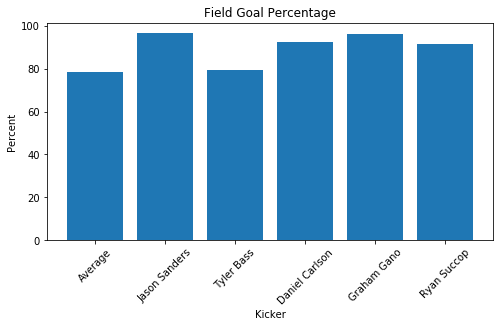

In [145]:
average, kick1, _1kick = print_metric(available_kickers, 'FG%', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'FG%', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'FG%', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'FG%', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'FG%', kicker5)

x = ['Average', kick1, kick2, kick3, kick4, kick5]
y = [average, _1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Field Goal Percentage', 'Kicker', 'Percent')

Avg XP%: 90.12
Jason Sanders XP%: 100.0
--------------------------------------------------
Avg XP%: 90.12
Tyler Bass XP%: 97.3
--------------------------------------------------
Avg XP%: 90.12
Daniel Carlson XP%: 97.2
--------------------------------------------------
Avg XP%: 90.12
Graham Gano XP%: 94.4
--------------------------------------------------
Avg XP%: 90.12
Ryan Succop XP%: 94.7
--------------------------------------------------


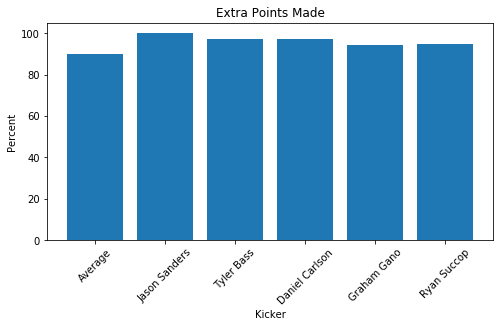

In [146]:
average, kick1, _1kick = print_metric(available_kickers, 'XP%', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'XP%', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'XP%', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'XP%', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'XP%', kicker5)

x = ['Average', kick1, kick2, kick3, kick4, kick5]
y = [average, _1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Extra Points Made', 'Kicker', 'Percent')

#### Additional Defense Analysis

Avg RZ_Percent: 60.36
Kansas City Chiefs RZ_Percent: 75.8
--------------------------------------------------
Avg RZ_Percent: 60.36
Pittsburgh Steelers RZ_Percent: 56.7
--------------------------------------------------
Avg RZ_Percent: 60.36
Indianapolis Colts RZ_Percent: 65.8
--------------------------------------------------
Avg RZ_Percent: 60.36
Arizona Cardinals RZ_Percent: 52.3
--------------------------------------------------
Avg RZ_Percent: 60.36
Minnesota Vikings RZ_Percent: 51.2
--------------------------------------------------


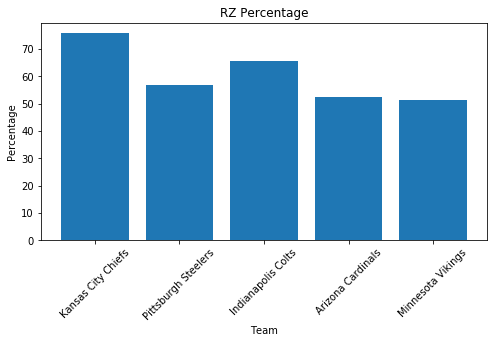

In [147]:
average, kdef1, _1kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def1)
average, kdef2, _2kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def2)
average, kdef3, _3kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def3)
average, kdef4, _4kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def4)
average, kdef5, _5kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def5)

x = [kdef1, kdef2, kdef3, kdef4, kdef5]
y = [_1kdef, _2kdef, _3kdef, _4kdef, _5kdef]

bar_plot(x, y, 'RZ Percentage', 'Team', 'Percentage')